<a href="https://colab.research.google.com/github/HoFangHuy/AI/blob/main/BTfuzzylogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

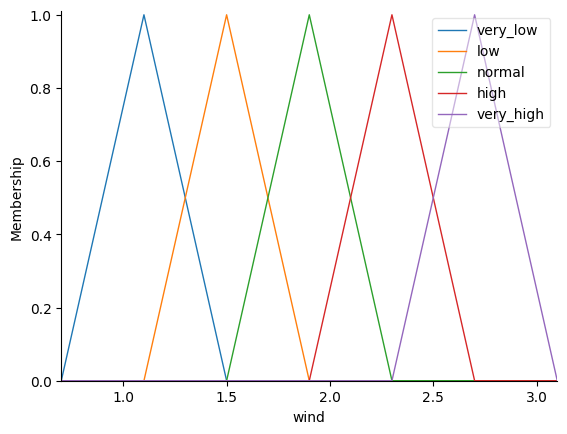

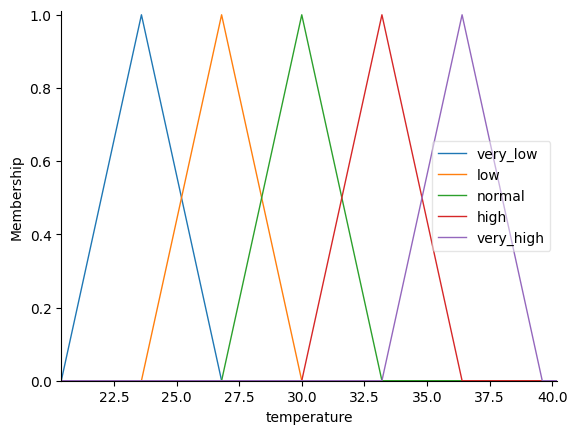

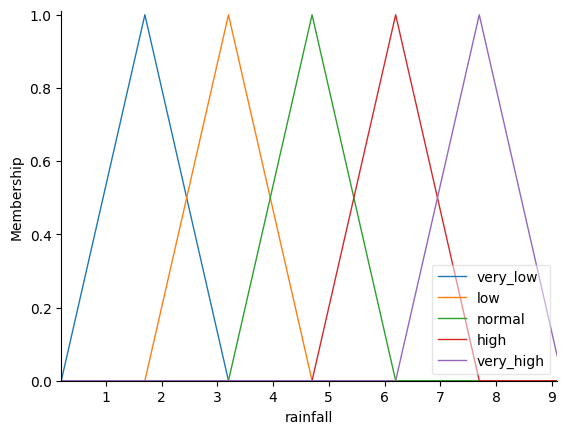

In [4]:
#VD2.1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
wind=ctrl.Antecedent(np.arange(0.7 , 3.2 , 0.1),'wind')
temperature=ctrl.Antecedent(np.arange(20.4 , 40.3 , 0.1),'temperature')
#output
rainfall=ctrl.Consequent(np.arange(0.2 , 9.2 , 0.1),'rainfall')

#phân tích giá trị
#wind
wind['very_low']=fuzz.trimf(wind.universe,[0.7 , 1.1 , 1.5])
wind['low']=fuzz.trimf(wind.universe,[1.1 , 1.5 , 1.9])
wind['normal']=fuzz.trimf(wind.universe,[1.5 , 1.9 , 2.3])
wind['high']=fuzz.trimf(wind.universe,[1.9 , 2.3 , 2.7])
wind['very_high']=fuzz.trimf(wind.universe,[2.3 , 2.7 , 3.1])

#temperature
temperature['very_low'] = fuzz.trimf(temperature.universe,[20.4 , 23.6 , 26.8])
temperature['low'] = fuzz.trimf(temperature.universe,[23.6 , 26.8 , 30])
temperature['normal'] = fuzz.trimf(temperature.universe,[26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe,[30 , 33.2 , 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2 , 36.4 , 39.6])

#rainfall
rainfall['very_low'] = fuzz.trimf(rainfall.universe,[0.2 , 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe,[1.7 , 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe,[3.2 , 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe,[4.7 , 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe,[6.2 , 7.7 , 9.2])
wind.view()
temperature.view()
rainfall.view()

Nguy cơ: 63.88888888888891 %


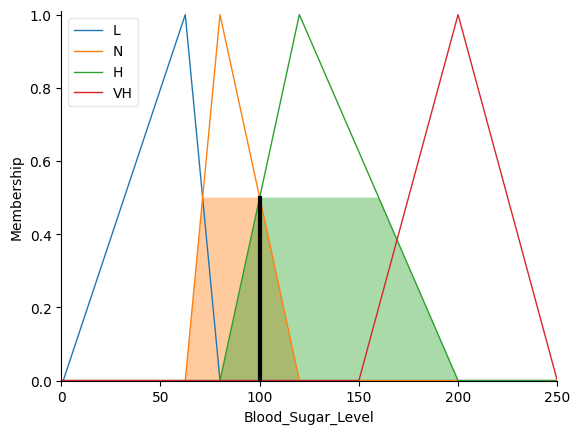

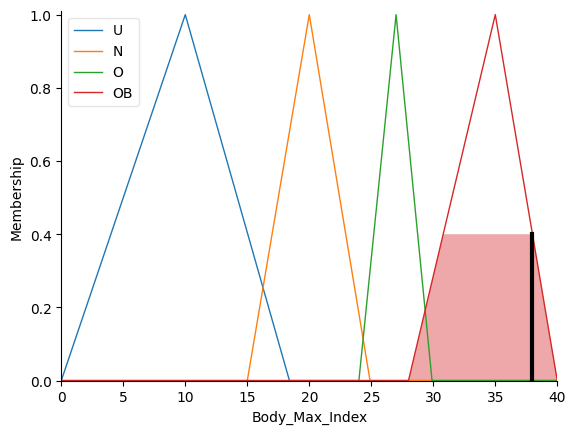

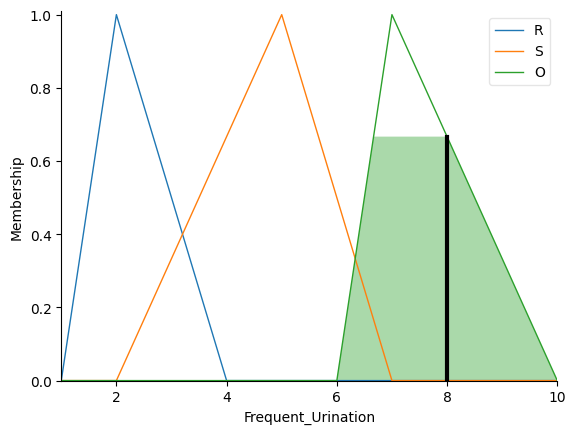

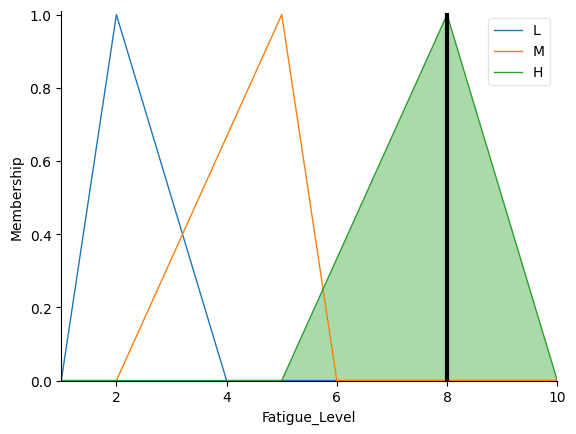

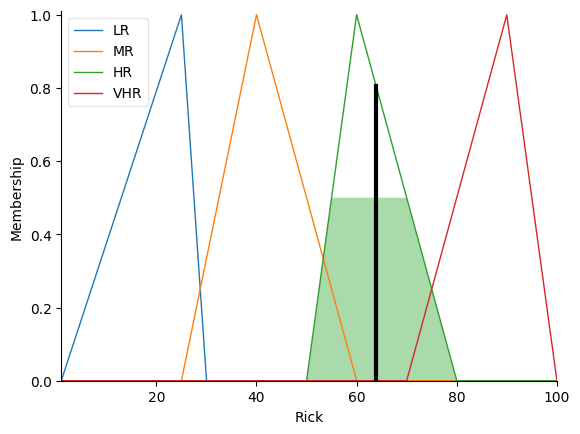

In [ ]:
#VD2.2

#input
Blood_Sugar_Level=ctrl.Antecedent(np.arange(0 , 250.1 , 0.1),'Blood_Sugar_Level')
Body_Max_Index=ctrl.Antecedent(np.arange(0 , 40.1 , 0.1),'Body_Max_Index')
Frequent_Urination=ctrl.Antecedent(np.arange(1 , 10.1 , 0.1),'Frequent_Urination')
Fatigue_Level=ctrl.Antecedent(np.arange(1 , 10.1 , 0.1),'Fatigue_Level')

#output
Rick=ctrl.Consequent(np.arange(1 , 100.1 , 0.01),'Rick')

#phân tích giá trị

#mức đường
Blood_Sugar_Level['L']=fuzz.trimf(Blood_Sugar_Level.universe, [1 , 62.5 , 80])
Blood_Sugar_Level['N']=fuzz.trimf(Blood_Sugar_Level.universe, [62.5 , 80 , 120])
Blood_Sugar_Level['H']=fuzz.trimf(Blood_Sugar_Level.universe, [80 , 120 , 200])
Blood_Sugar_Level['VH']=fuzz.trimf(Blood_Sugar_Level.universe, [150 , 200 , 250])

#thể trạng cơ thể
Body_Max_Index['U']=fuzz.trimf(Body_Max_Index.universe, [0 , 10 , 18.4])
Body_Max_Index['N']=fuzz.trimf(Body_Max_Index.universe, [15 , 20 , 24.9])
Body_Max_Index['O']=fuzz.trimf(Body_Max_Index.universe, [24 , 27 , 29.9])
Body_Max_Index['OB']=fuzz.trimf(Body_Max_Index.universe, [28 , 35 , 40])

#tần suất đi vệ sinh
Frequent_Urination['R']=fuzz.trimf(Frequent_Urination.universe, [1 , 2 , 4])
Frequent_Urination['S']=fuzz.trimf(Frequent_Urination.universe, [2 , 5 , 7])
Frequent_Urination['O']=fuzz.trimf(Frequent_Urination.universe, [6 , 7 , 10])

#mức độ mệt mỏi
Fatigue_Level['L']=fuzz.trimf(Fatigue_Level.universe, [1 , 2 , 4])
Fatigue_Level['M']=fuzz.trimf(Fatigue_Level.universe, [2 , 5 , 6])
Fatigue_Level['H']=fuzz.trimf(Fatigue_Level.universe, [5 , 8 , 10])

#rủi ro
Rick['LR']=fuzz.trimf(Rick.universe, [1 , 25 , 30])
Rick['MR']=fuzz.trimf(Rick.universe, [25 , 40 , 60 ])
Rick['HR']=fuzz.trimf(Rick.universe, [50 , 60 , 80 ])
Rick['VHR']=fuzz.trimf(Rick.universe, [70 , 90 , 100 ])

#luật dựa trên đường trong máu và tần suất đi tiểu
rule1=ctrl.Rule(Blood_Sugar_Level['VH'] & Frequent_Urination['O'], Rick['VHR'])
rule2=ctrl.Rule(Blood_Sugar_Level['VH'] & Frequent_Urination['S'], Rick['HR'])
rule3=ctrl.Rule(Blood_Sugar_Level['H'] & Frequent_Urination['O'], Rick['HR'])
rule4=ctrl.Rule(Blood_Sugar_Level['N'] & Frequent_Urination['R'], Rick['LR'])

#luật dựa trên đường trong máu và BMI
rule5=ctrl.Rule(Blood_Sugar_Level['VH'] & Body_Max_Index['OB'], Rick['VHR'])
rule6=ctrl.Rule(Blood_Sugar_Level['VH'] & Body_Max_Index['O'], Rick['HR'])
rule7=ctrl.Rule(Blood_Sugar_Level['H'] & Body_Max_Index['O'], Rick['HR'])
rule8=ctrl.Rule(Blood_Sugar_Level['H'] & Body_Max_Index['O'], Rick['MR'])
rule9=ctrl.Rule(Blood_Sugar_Level['N'] & Body_Max_Index['N'], Rick['LR'])

#luật dựa trên đường trong máu và mệt mỏi
rule10=ctrl.Rule(Blood_Sugar_Level['VH'] & Fatigue_Level['H'], Rick['VHR'])
rule11=ctrl.Rule(Blood_Sugar_Level['H'] & Fatigue_Level['H'], Rick['HR'])
rule12=ctrl.Rule(Blood_Sugar_Level['H'] & Fatigue_Level['M'], Rick['MR'])
rule13=ctrl.Rule(Blood_Sugar_Level['N'] & Fatigue_Level['L'], Rick['LR'])
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['Blood_Sugar_Level'] = 100
fuzzy_system.input['Body_Max_Index'] = 38
fuzzy_system.input['Frequent_Urination'] = 8
fuzzy_system.input['Fatigue_Level'] = 8

fuzzy_system.compute()


print(f"Nguy cơ: {fuzzy_system.output['Rick']}",'%')

Blood_Sugar_Level.view(sim=fuzzy_system)
Body_Max_Index.view(sim=fuzzy_system)
Frequent_Urination.view(sim=fuzzy_system)
Fatigue_Level.view(sim=fuzzy_system)
Rick.view(sim=fuzzy_system)

Final Price: 10.00 (Medium)


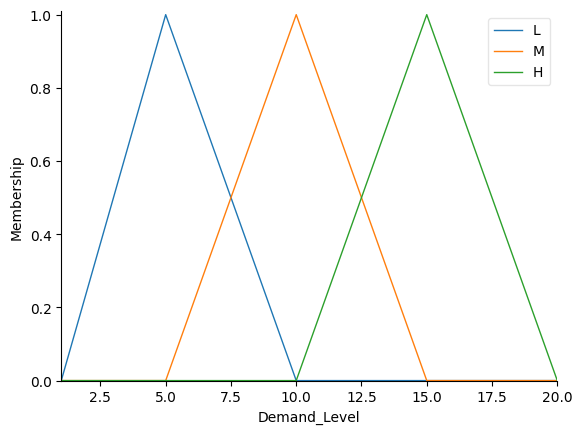

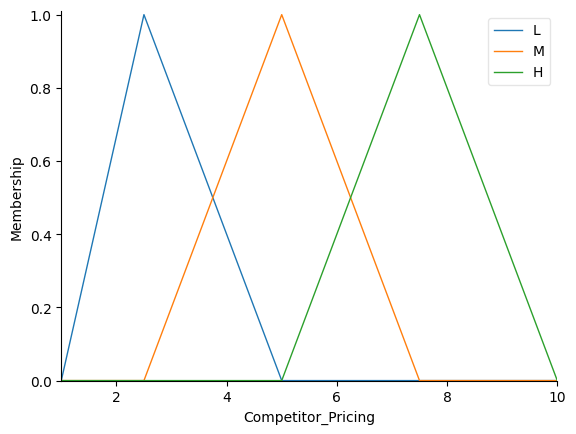

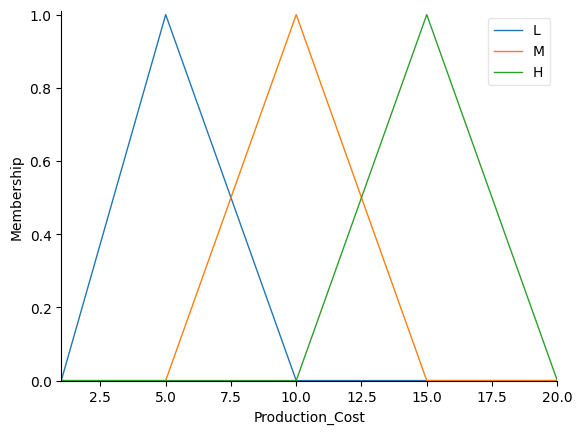

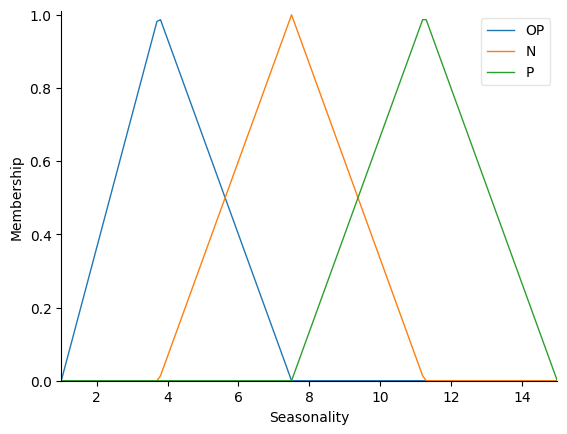

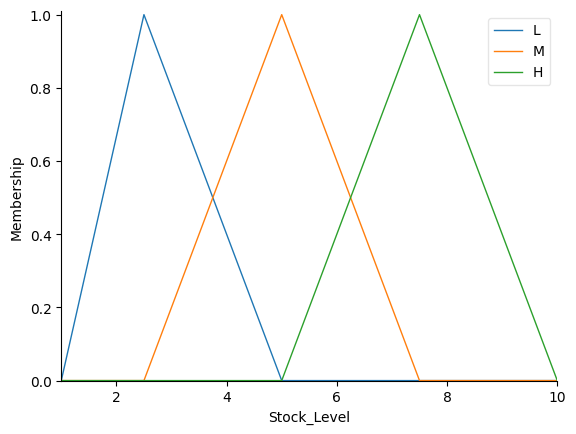

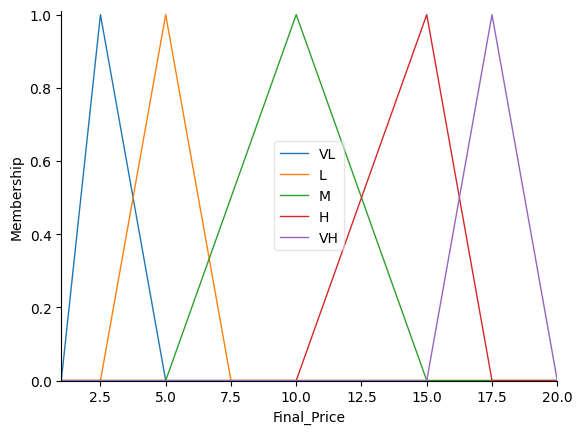

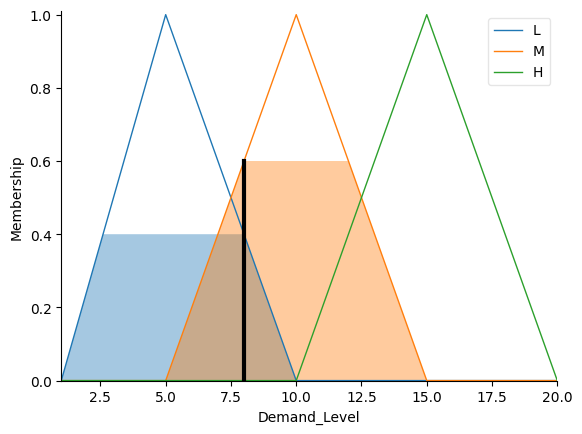

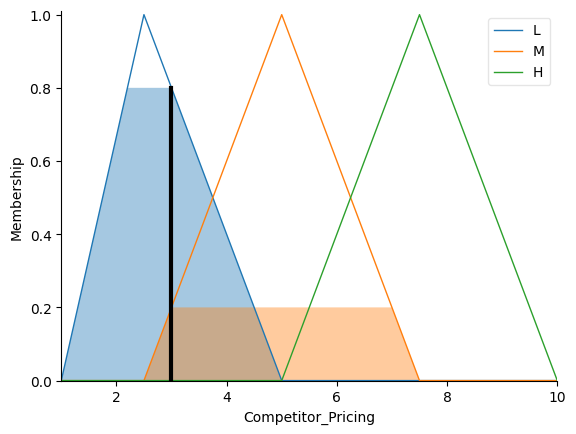

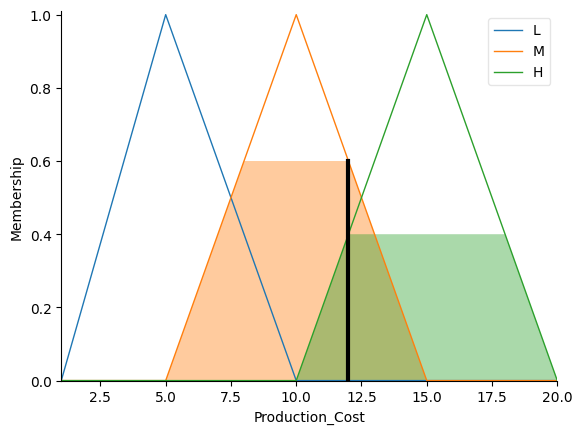

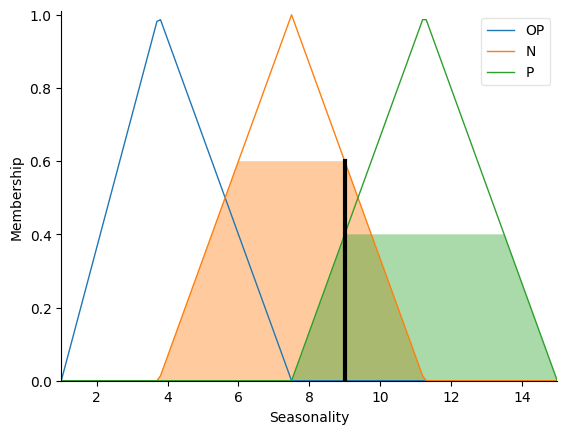

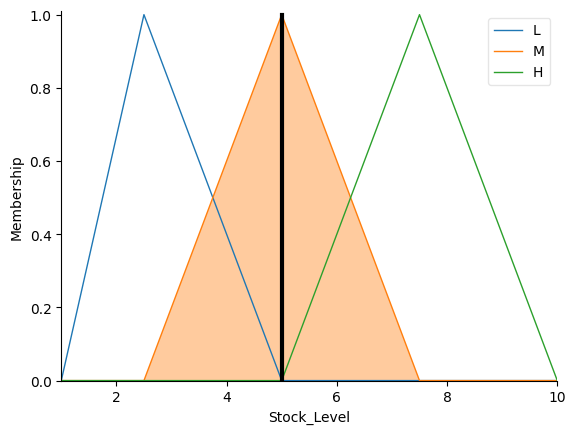

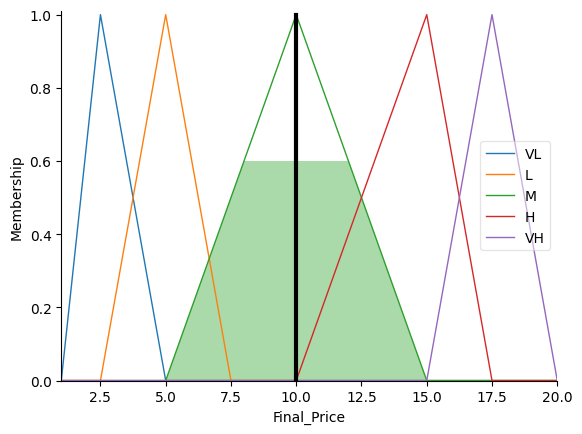

In [ ]:
#VD2.3
#input
Demand_Level = ctrl.Antecedent(np.arange(1 , 20.1 , 0.1), 'Demand_Level')
Competitor_Pricing = ctrl.Antecedent(np.arange(1 , 10.1 , 0.1), 'Competitor_Pricing')
Production_Cost = ctrl.Antecedent(np.arange(1 , 20.1 , 0.1), 'Production_Cost')
Seasonality = ctrl.Antecedent(np.arange(1 , 15.1 , 0.1), 'Seasonality')
Stock_Level = ctrl.Antecedent(np.arange(1 , 10.1 , 0.1), "Stock_Level")

#output
Final_Price = ctrl.Consequent(np.arange(1 , 20.1 , 0.1), 'Final_Price')

#phân tích giá trị
Demand_Level['L'] = fuzz.trimf(Demand_Level.universe, [1 , 5 , 10])
Demand_Level['M'] = fuzz.trimf(Demand_Level.universe, [5 , 10 , 15])
Demand_Level['H'] = fuzz.trimf(Demand_Level.universe, [10 , 15 , 20])

Competitor_Pricing['L'] = fuzz.trimf(Competitor_Pricing.universe, [1 , 2.5 , 5])
Competitor_Pricing['M'] = fuzz.trimf(Competitor_Pricing.universe, [2.5 , 5 , 7.5])
Competitor_Pricing['H'] = fuzz.trimf(Competitor_Pricing.universe, [5 , 7.5 , 10])

Production_Cost['L'] = fuzz.trimf(Production_Cost.universe, [1 , 5 , 10])
Production_Cost['M'] = fuzz.trimf(Production_Cost.universe, [5 , 10 , 15])
Production_Cost['H'] = fuzz.trimf(Production_Cost.universe, [10 , 15 , 20])

Seasonality['OP'] = fuzz.trimf(Seasonality.universe, [1 , 3.75 , 7.5])
Seasonality['N'] = fuzz.trimf(Seasonality.universe, [3.75 , 7.5 , 11.25])
Seasonality['P'] = fuzz.trimf(Seasonality.universe, [7.5 , 11.25 , 15])

Stock_Level['L'] = fuzz.trimf(Stock_Level.universe, [1 , 2.5 , 5])
Stock_Level['M'] = fuzz.trimf(Stock_Level.universe, [2.5 , 5 , 7.5])
Stock_Level['H'] = fuzz.trimf(Stock_Level.universe, [5 , 7.5 , 10])

Final_Price['VL'] = fuzz.trimf(Final_Price.universe, [1 , 2.5 , 5])
Final_Price['L'] = fuzz.trimf(Final_Price.universe, [2.5 , 5 , 7.5])
Final_Price['M'] = fuzz.trimf(Final_Price.universe, [5 , 10 , 15])
Final_Price['H'] = fuzz.trimf(Final_Price.universe, [10 , 15 , 17.5])
Final_Price['VH'] = fuzz.trimf(Final_Price.universe, [15 , 17.5 , 20])

Demand_Level.view()
Competitor_Pricing.view()
Production_Cost.view()
Seasonality.view()
Stock_Level.view()
Final_Price.view()

#Rule

#Final_Price very high
rule1 = ctrl.Rule(Demand_Level['H'] & Competitor_Pricing['H'] & Stock_Level['L'], Final_Price['VH'])
rule2 = ctrl.Rule(Demand_Level['H'] & Seasonality['P'] & Stock_Level['L'], Final_Price['VH'])
rule3 = ctrl.Rule(Demand_Level['M'] & Production_Cost['H'] & Stock_Level['L'], Final_Price['VH'])

#Final_Price high
rule4 = ctrl.Rule(Demand_Level['H'] & Competitor_Pricing['M'] & Stock_Level['M'], Final_Price['H'])
rule5 = ctrl.Rule(Demand_Level['M'] & Competitor_Pricing['H'] & Stock_Level['L'], Final_Price['H'])
rule6 = ctrl.Rule(Demand_Level['H'] & Seasonality['P'] & Stock_Level['M'], Final_Price['H'])

#Final_Price medium
rule7 = ctrl.Rule(Demand_Level['M'] & Competitor_Pricing['M'] & Stock_Level['M'], Final_Price['M'])
rule8 = ctrl.Rule(Demand_Level['L'] & Competitor_Pricing['H'] & Stock_Level['M'], Final_Price['M'])
rule9 = ctrl.Rule(Demand_Level['M'] & Production_Cost['M'] & Stock_Level['M'], Final_Price['M'])

#Final_Price low
rule10 = ctrl.Rule(Demand_Level['L'] & Competitor_Pricing['L'] & Stock_Level['H'], Final_Price['L'])
rule11 = ctrl.Rule(Demand_Level['M'] & Production_Cost['L'] & Stock_Level['H'], Final_Price['L'])
rule12 = ctrl.Rule(Demand_Level['L'] & Seasonality['OP'] & Stock_Level['H'], Final_Price['L'])

#Final_Price very low
rule13 = ctrl.Rule(Demand_Level['L'] & Competitor_Pricing['L'] & Stock_Level['H'], Final_Price['VL'])
rule14 = ctrl.Rule(Demand_Level['L'] & Seasonality['OP'] & Stock_Level['H'], Final_Price['VL'])
rule15 = ctrl.Rule(Demand_Level['M'] & Production_Cost['L'] & Stock_Level['H'], Final_Price['VL'])
rule16 = ctrl.Rule(Demand_Level['M'] & Competitor_Pricing['L'] & Stock_Level['H'], Final_Price['VL'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['Demand_Level'] = 8
fuzzy_system.input['Competitor_Pricing'] = 3
fuzzy_system.input['Production_Cost'] = 12
fuzzy_system.input['Seasonality'] = 9
fuzzy_system.input['Stock_Level'] = 5

fuzzy_system.compute()

final_price = fuzzy_system.output['Final_Price']

if final_price <= 3:
    price_category = "Very Low"
elif 3 < final_price <= 7:
    price_category = "Low"
elif 7 < final_price <= 12:
    price_category = "Medium"
elif 12 < final_price <= 16:
    price_category = "High"
else:
    price_category = "Very High"

print(f"Final Price: {final_price:.2f} ({price_category})")


Demand_Level.view(sim = fuzzy_system)
Competitor_Pricing.view(sim = fuzzy_system)
Production_Cost.view(sim = fuzzy_system)
Seasonality.view(sim = fuzzy_system)
Stock_Level.view(sim = fuzzy_system)
Final_Price.view(sim = fuzzy_system)

Thời gian giặt: 40.67810457516356 phút 
Lượng nước: 23.92469996128529 lít 


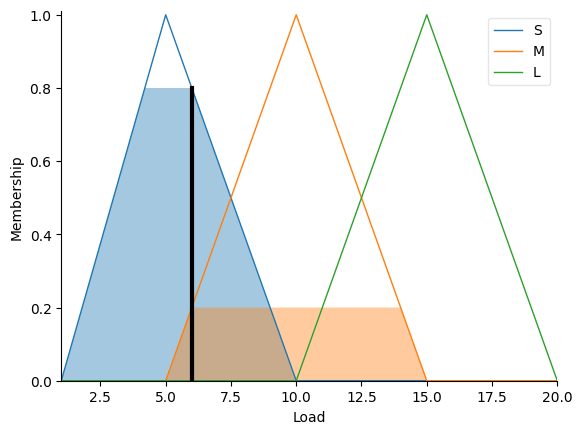

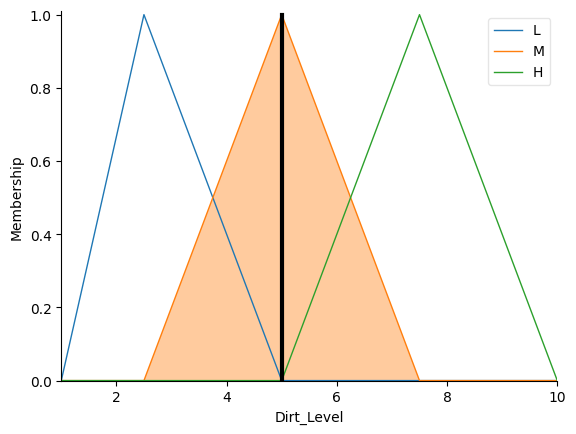

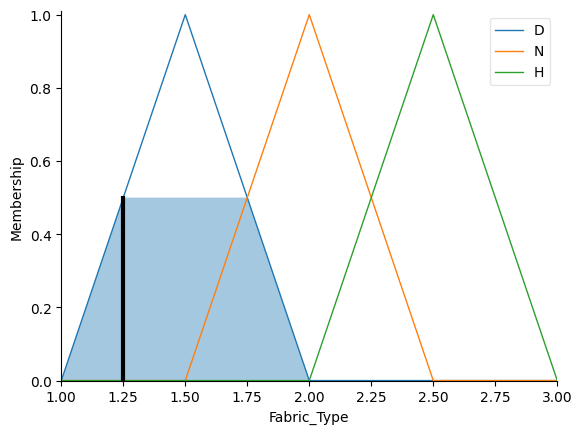

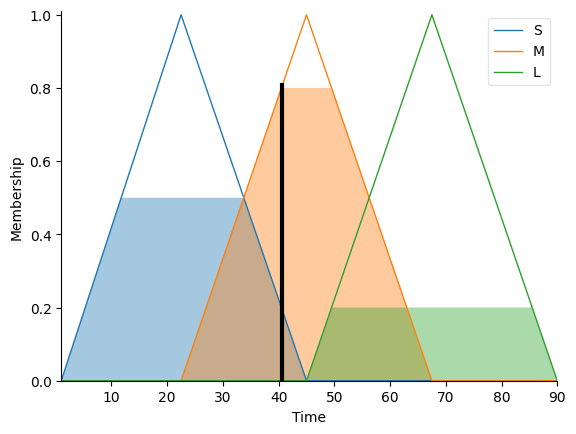

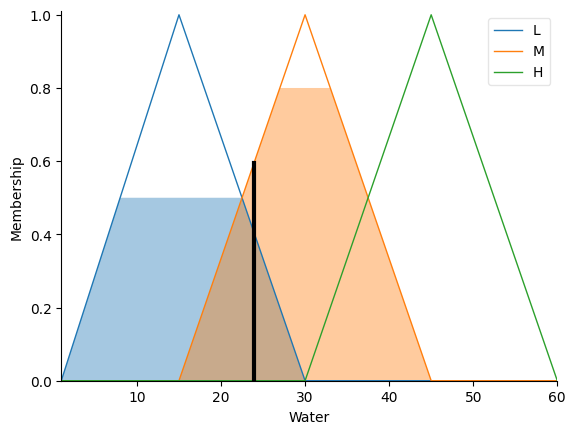

In [ ]:
#VD 2.4
#input
Load=ctrl.Antecedent(np.arange(1, 20.1, 0.1), 'Load')
Dirt_Level=ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Dirt_Level')
Fabric_Type=ctrl.Antecedent(np.arange(1, 3.1, 0.1), 'Fabric_Type')

#output
Time=ctrl.Consequent(np.arange(1, 90.1, 0.1), 'Time')
Water=ctrl.Consequent(np.arange(1, 60.1, 0.1), 'Water')

#phân tích giá trị
Load['S'] = fuzz.trimf(Load.universe, [1, 5, 10])
Load['M'] = fuzz.trimf(Load.universe, [5, 10, 15])
Load['L'] = fuzz.trimf(Load.universe, [10, 15, 20])

Dirt_Level['L'] = fuzz.trimf(Dirt_Level.universe, [1, 2.5, 5])
Dirt_Level['M'] = fuzz.trimf(Dirt_Level.universe, [2.5, 5, 7.5])
Dirt_Level['H'] = fuzz.trimf(Dirt_Level.universe, [5, 7.5, 10])

Fabric_Type['D'] = fuzz.trimf(Fabric_Type.universe, [1, 1.5, 2])
Fabric_Type['N'] = fuzz.trimf(Fabric_Type.universe, [1.5, 2, 2.5])
Fabric_Type['H'] = fuzz.trimf(Fabric_Type.universe, [2, 2.5, 3])

Time['S'] = fuzz.trimf(Time.universe, [1, 22.5, 45])
Time['M'] = fuzz.trimf(Time.universe, [22.5, 45, 67.5])
Time['L'] = fuzz.trimf(Time.universe, [45, 67.5, 90])

Water['L'] = fuzz.trimf(Water.universe, [1, 15, 30])
Water['M'] = fuzz.trimf(Water.universe, [15, 30, 45])
Water['H'] = fuzz.trimf(Water.universe, [30, 45, 60])

#rule
#luật dựa vào số kg đồ và độ bẩn
rule1 = ctrl.Rule(Load['S'] & Dirt_Level['L'], (Time['S'] , Water['L']), label='rule1')
rule2 = ctrl.Rule(Load['S'] & Dirt_Level['M'], (Time['M'] , Water['M']), label='rule2')
rule3 = ctrl.Rule(Load['S'] & Dirt_Level['H'], (Time['L'], Water['M']), label="rule3")
rule4 = ctrl.Rule(Load['M'] & Dirt_Level['L'], (Time['M'] , Water['M']), label='rule4')
rule5 = ctrl.Rule(Load['M'] & Dirt_Level['M'], (Time['L'], Water['M']), label="rule5")
rule6 = ctrl.Rule(Load['M'] & Dirt_Level['H'], (Time['L'], Water['M']), label="rule6")
rule7 = ctrl.Rule(Load['L'] & Dirt_Level['L'], (Time['M'], Water['H']), label="rule7")
rule8 = ctrl.Rule(Load['L'] & Dirt_Level['M'], (Time['L'], Water['M']), label="rule8")
rule9 = ctrl.Rule(Load['L'] & Dirt_Level['H'], (Time['L'], Water['M']), label="rule9")
rule10 = ctrl.Rule(Load['L'] & Dirt_Level['H'], (Time['L'], Water['H']), label="rule10")

#luật dựa trên loại vải
rule11 = ctrl.Rule(Fabric_Type['D'], (Time['S'] , Water['L']), label='rule11')
#rule12 = ctrl.Rule(Fabric_Type['N'], Time() & Water()) bỏ qua quy tắc này
rule13 = ctrl.Rule(Fabric_Type['H'], (Time['L'], Water['H']), label="rule13")


#luật kết hợp các yếu tố
rule14 = ctrl.Rule(Load['L'] & Dirt_Level['H'] & Fabric_Type['H'], (Time['L'], Water['H']), label="rule14")
rule15 = ctrl.Rule(Load['S'] & Dirt_Level['L'] & Fabric_Type['D'], (Time['S'] , Water['L']), label='rule15')
rule16 = ctrl.Rule(Load['M'] & Dirt_Level['M'] & Fabric_Type['N'], (Time['M'] , Water['M']), label='rule16')
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule13, rule14, rule15,rule16])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['Load'] = 6
fuzzy_system.input['Dirt_Level'] = 5
fuzzy_system.input['Fabric_Type'] = 1.25

fuzzy_system.compute()

print(f"Thời gian giặt: {fuzzy_system.output['Time']} phút ")

print(f"Lượng nước: {fuzzy_system.output['Water']} lít ")

Load.view(sim=fuzzy_system)
Dirt_Level.view(sim=fuzzy_system)
Fabric_Type.view(sim=fuzzy_system)
Time.view(sim=fuzzy_system)
Water.view(sim=fuzzy_system)

Tốc độ quạt: 0.9249999999999998 
Mức độ làm mát: 1.485000000000001 


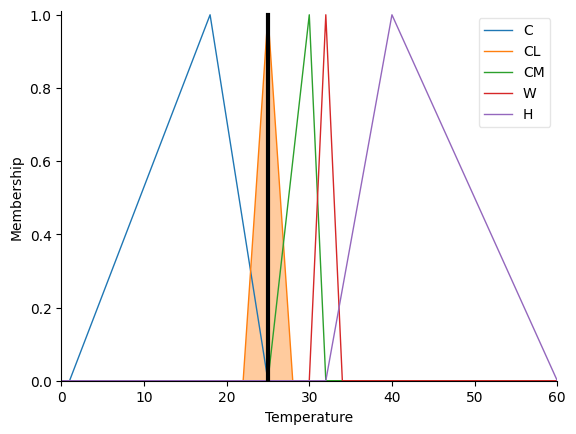

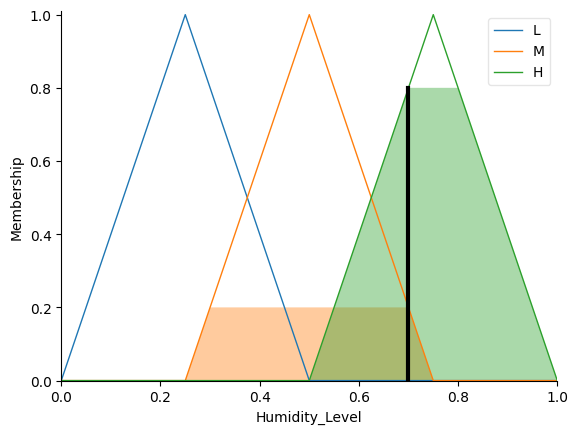

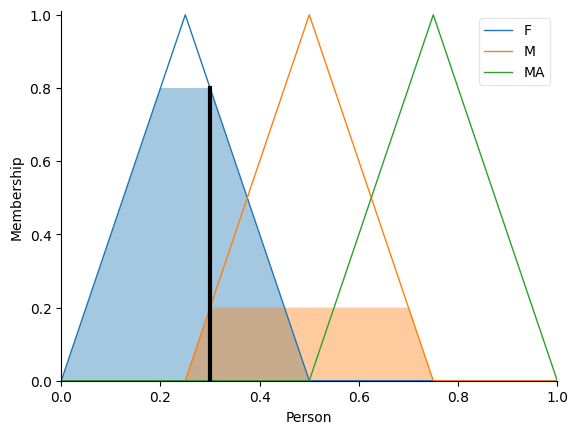

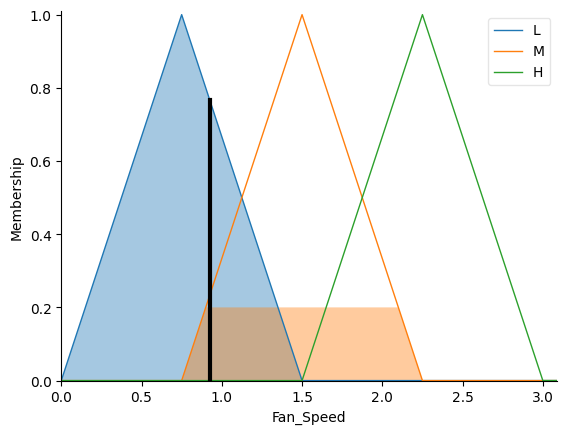

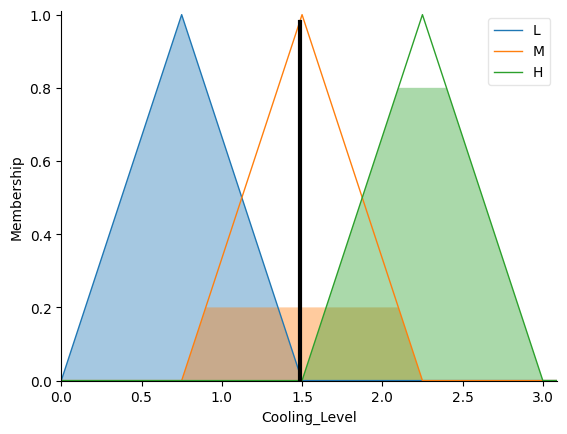

In [ ]:
#vd2.5

#input
Temperature = ctrl.Antecedent(np.arange(0, 60.1, 0.1), 'Temperature')
Humidity_Level = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'Humidity_Level')
Person = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'Person')

#output
Fan_Speed = ctrl.Consequent(np.arange(0, 3.1, 0.01), 'Fan_Speed')
Cooling_Level = ctrl.Consequent(np.arange(0, 3.1, 0.01), 'Cooling_Level')

#phân tích giá trị
Temperature['C'] = fuzz.trimf(Temperature.universe, [1, 18, 25])
Temperature['CL'] = fuzz.trimf(Temperature.universe, [22, 25, 28])
Temperature['CM'] = fuzz.trimf(Temperature.universe, [25, 30, 32])
Temperature['W'] = fuzz.trimf(Temperature.universe, [30, 32, 34])
Temperature['H'] = fuzz.trimf(Temperature.universe, [32, 40, 60])

Humidity_Level['L'] = fuzz.trimf(Humidity_Level.universe, [0, 0.25, 0.5])
Humidity_Level['M'] = fuzz.trimf(Humidity_Level.universe, [0.25, 0.5, 0.75])
Humidity_Level['H'] = fuzz.trimf(Humidity_Level.universe, [0.5, 0.75, 1])

Person['F'] = fuzz.trimf(Person.universe, [0, 0.25, 0.5])
Person['M'] = fuzz.trimf(Person.universe, [0.25, 0.5, 0.75])
Person['MA'] = fuzz.trimf(Person.universe, [0.5, 0.75, 1])

Fan_Speed['L'] = fuzz.trimf(Fan_Speed.universe, [0, 0.75, 1.5])
Fan_Speed['M'] = fuzz.trimf(Fan_Speed.universe, [0.75, 1.5, 2.25])
Fan_Speed['H'] = fuzz.trimf(Fan_Speed.universe, [1.5, 2.25, 3])

Cooling_Level['L'] = fuzz.trimf(Cooling_Level.universe, [0, 0.75, 1.5])
Cooling_Level['M'] = fuzz.trimf(Cooling_Level.universe, [0.75, 1.5, 2.25])
Cooling_Level['H'] = fuzz.trimf(Cooling_Level.universe, [1.5, 2.25, 3])

#Rule

#dựa trên nhiệt độ phòng và tốc độ quạt
rule1 = ctrl.Rule(Temperature['C'], Fan_Speed['L'])
rule2 = ctrl.Rule(Temperature['CL'], Fan_Speed['L'])
rule3 = ctrl.Rule(Temperature['CM'], Fan_Speed['M'])
rule4 = ctrl.Rule(Temperature['W'], Fan_Speed['H'])
rule5 = ctrl.Rule(Temperature['H'], Fan_Speed['H'])

#dựa trên nhiệt độ phòng và mức độ làm mát
rule6 = ctrl.Rule(Temperature['C'], Cooling_Level['L'])
rule7 = ctrl.Rule(Temperature['CL'], Cooling_Level['L'])
rule8 = ctrl.Rule(Temperature['CM'], Cooling_Level['M'])
rule9 = ctrl.Rule(Temperature['W'], Cooling_Level['H'])
rule10 = ctrl.Rule(Temperature['H'], Cooling_Level['H'])

#dựa trên độ ẩm và mức độ làm mát
rule11 = ctrl.Rule(Humidity_Level['L'], Cooling_Level['L'])
rule12 = ctrl.Rule(Humidity_Level['M'], Cooling_Level['M'])
rule13 = ctrl.Rule(Humidity_Level['H'], Cooling_Level['H'])

#dựa trên số người và tốc độ quạt
rule14 = ctrl.Rule(Person['F'], Fan_Speed['L'])
rule15 = ctrl.Rule(Person['M'], Fan_Speed['M'])
rule16 = ctrl.Rule(Person['MA'], Fan_Speed['H'])

#kết hợp các yếu tố
rule17 = ctrl.Rule(Temperature['H'] & Humidity_Level['H'] & Person['MA'], (Fan_Speed['H'], Cooling_Level['H']))
rule18 = ctrl.Rule(Temperature['CM'] & Humidity_Level['M'] & Person['M'], (Fan_Speed['M'], Cooling_Level['M']))
rule19 = ctrl.Rule(Temperature['CL'] & Humidity_Level['L'] & Person['F'], (Fan_Speed['L'], Cooling_Level['L']))


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15,rule16,rule17,rule18,rule19])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['Temperature'] = 25
fuzzy_system.input['Humidity_Level'] = 0.7
fuzzy_system.input['Person'] = 0.3

fuzzy_system.compute()

print(f"Tốc độ quạt: {fuzzy_system.output['Fan_Speed']} ")

print(f"Mức độ làm mát: {fuzzy_system.output['Cooling_Level']} ")

Temperature.view(sim=fuzzy_system)
Humidity_Level.view(sim=fuzzy_system)
Person.view(sim=fuzzy_system)
Fan_Speed.view(sim=fuzzy_system)
Cooling_Level.view(sim=fuzzy_system)

Thời gian: 19.117894382778342   phút
Hiệu suất: 37.486177327213746  %


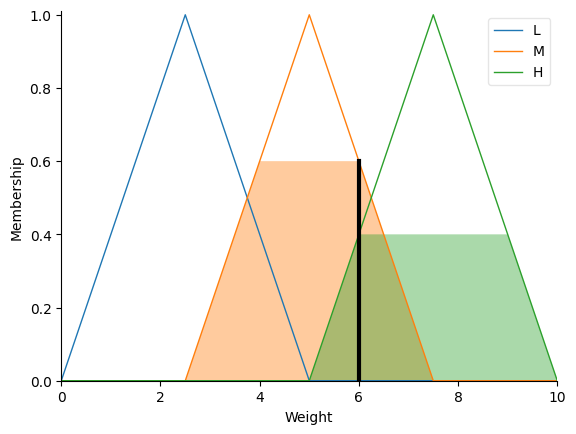

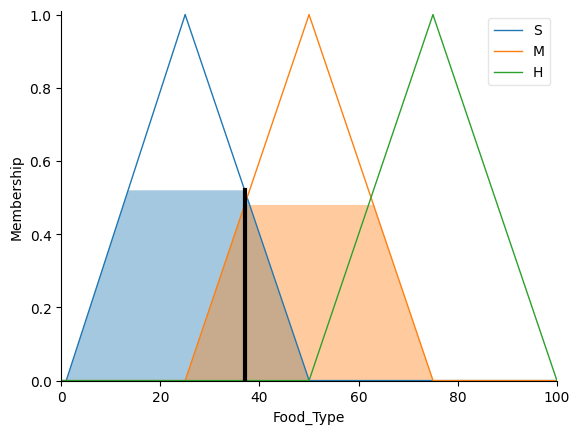

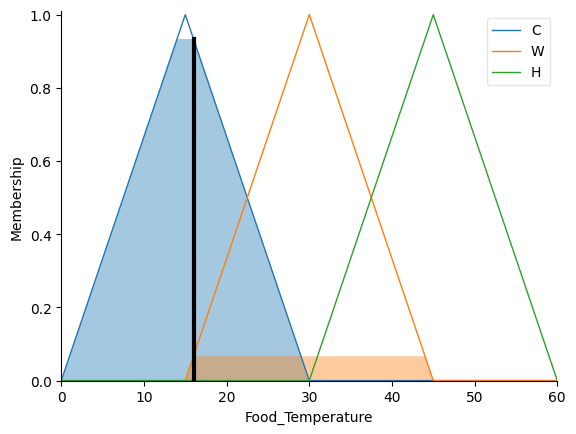

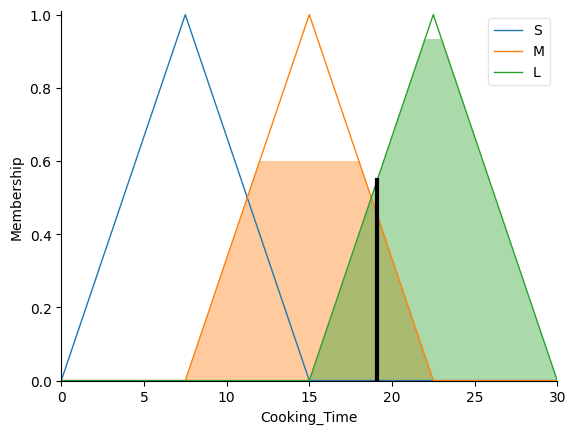

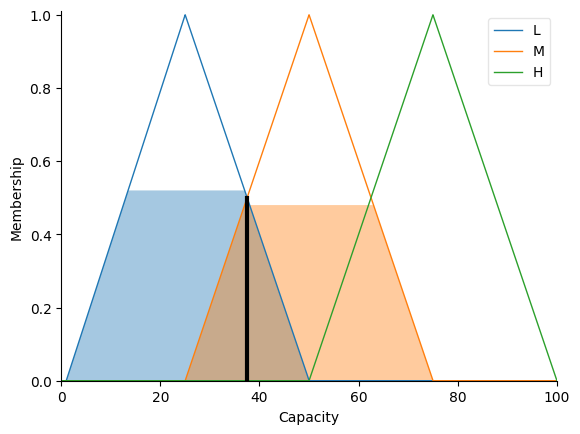

In [ ]:
#VD 2.6
#input
Weight = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Weight')
Food_Type = ctrl.Antecedent(np.arange(0, 100.1, 0.01), 'Food_Type')
Food_Temperature = ctrl.Antecedent(np.arange(0, 60.1, 0.1), 'Food_Temperature')

#output
Cooking_Time = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'Cooking_Time')
Capacity = ctrl.Consequent(np.arange(0, 100.1, 0.01), 'Capacity')

#phân tích giá trị
Weight['L'] = fuzz.trimf(Weight.universe, [0, 2.5, 5])
Weight['M'] = fuzz.trimf(Weight.universe, [2.5, 5, 7.5])
Weight['H'] = fuzz.trimf(Weight.universe, [5, 7.5, 10])

Food_Type['S'] = fuzz.trimf(Food_Type.universe, [1, 25, 50])
Food_Type['M'] = fuzz.trimf(Food_Type.universe, [25, 50, 75])
Food_Type['H'] = fuzz.trimf(Food_Type.universe, [50, 75, 100])

Food_Temperature['C'] = fuzz.trimf(Food_Temperature.universe, [0, 15, 30])
Food_Temperature['W'] = fuzz.trimf(Food_Temperature.universe, [15, 30, 45])
Food_Temperature['H'] = fuzz.trimf(Food_Temperature.universe, [30, 45, 60])

Cooking_Time['S'] = fuzz.trimf(Cooking_Time.universe, [0, 7.5, 15])
Cooking_Time['M'] = fuzz.trimf(Cooking_Time.universe, [7.5, 15, 22.5])
Cooking_Time['L'] = fuzz.trimf(Cooking_Time.universe, [15, 22.5, 30])

Capacity['L'] = fuzz.trimf(Capacity.universe, [1, 25, 50])
Capacity['M'] = fuzz.trimf(Capacity.universe, [25, 50, 75])
Capacity['H'] = fuzz.trimf(Capacity.universe, [50, 75, 100])

#Rule

#luật dựa trên trọng lượng thức ăn và thời gian nấu
rule1 = ctrl.Rule(Weight['L'], Cooking_Time['S'])
rule2 = ctrl.Rule(Weight['M'], Cooking_Time['M'])
rule3 = ctrl.Rule(Weight['H'], Cooking_Time['L'])

#luật dựa trên loại thực phẩm và công suất
rule4 = ctrl.Rule(Food_Type['S'], Capacity['L'])
rule5 = ctrl.Rule(Food_Type['M'], Capacity['M'])
rule6 = ctrl.Rule(Food_Type['H'], Capacity['H'])

#luật dựa trên nhiệt độ ban đầu và thời gian nấu
rule7 = ctrl.Rule(Food_Temperature['C'], Cooking_Time['L'])
rule8 = ctrl.Rule(Food_Temperature['W'], Cooking_Time['M'])
rule9 = ctrl.Rule(Food_Temperature['H'], Cooking_Time['S'])

#luật kết hợp tất cả các yếu tố
rule10 = ctrl.Rule(Weight['H'] & Food_Type['H'] & Food_Temperature['C'], (Cooking_Time['L'], Capacity['L'] ) )
rule11 = ctrl.Rule(Weight['M'] & Food_Type['S'] & Food_Temperature['W'], (Cooking_Time['M'], Capacity['L'] ) )
rule12 = ctrl.Rule(Weight['L'] & Food_Type['M'] & Food_Temperature['H'], (Cooking_Time['S'], Capacity['M'] ) )

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['Weight'] = 6
fuzzy_system.input['Food_Type'] = 37
fuzzy_system.input['Food_Temperature'] = 16

fuzzy_system.compute()

print(f"Thời gian: {fuzzy_system.output['Cooking_Time']} ", ' phút')

print(f"Hiệu suất: {fuzzy_system.output['Capacity']} ", '%')

Weight.view(sim=fuzzy_system)
Food_Type.view(sim=fuzzy_system)
Food_Temperature.view(sim=fuzzy_system)
Cooking_Time.view(sim=fuzzy_system)
Capacity.view(sim=fuzzy_system)

Cooking Time: 22.50 minutes (Long)
Heat Level: 75.00% (High)


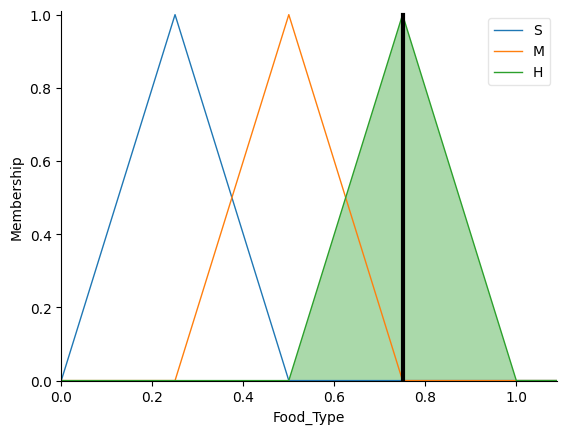

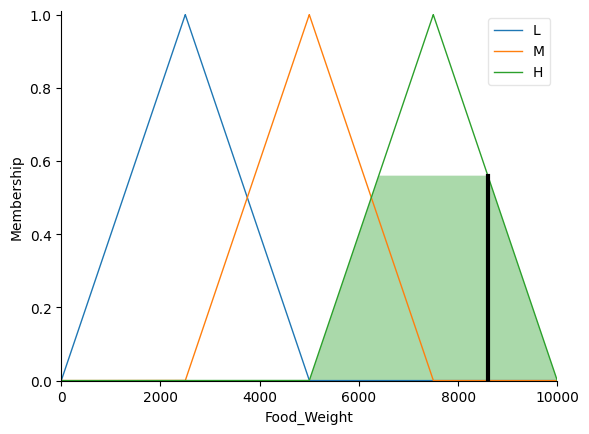

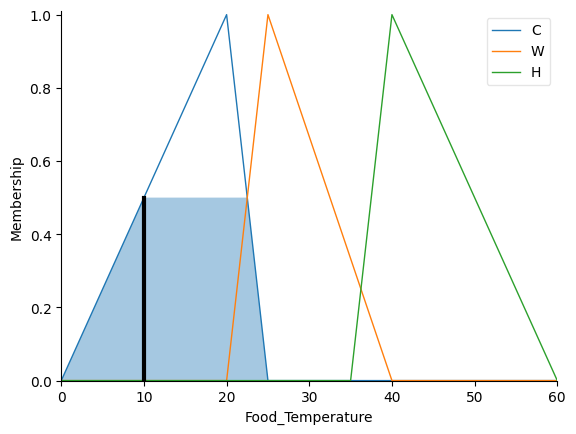

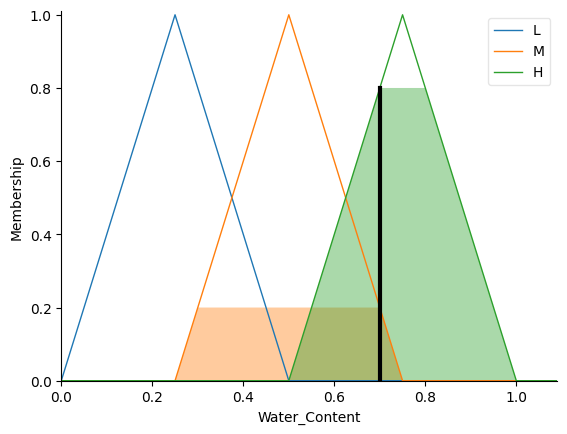

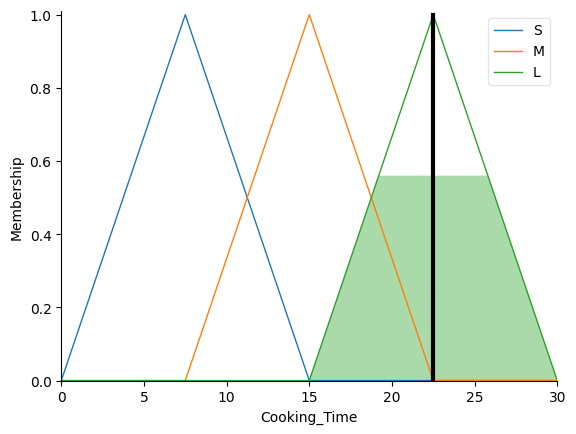

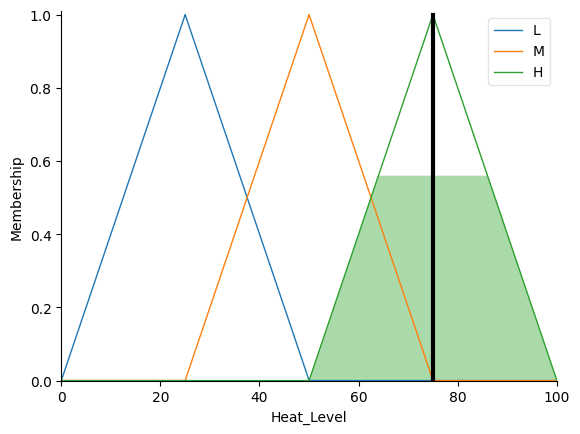

In [ ]:
#VD2.7
#input
Food_Type = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'Food_Type')
Food_Weight = ctrl.Antecedent(np.arange(0, 10000.1, 0.1), 'Food_Weight')
Initial_Temperature = ctrl.Antecedent(np.arange(0, 60.1, 0.1), 'Food_Temperature')
Water_Content = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'Water_Content')

#output
Cooking_Time = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'Cooking_Time')
Heat_Level = ctrl.Consequent(np.arange(0, 100.1, 0.01), 'Heat_Level')

#phân tích giá trị
Food_Type['S'] = fuzz.trimf(Food_Type.universe, [0, 0.25, 0.5])
Food_Type['M'] = fuzz.trimf(Food_Type.universe, [0.25, 0.5, 0.75])
Food_Type['H'] = fuzz.trimf(Food_Type.universe, [0.5, 0.75, 1])

Food_Weight['L'] = fuzz.trimf(Food_Weight.universe, [0, 2500, 5000])
Food_Weight['M'] = fuzz.trimf(Food_Weight.universe, [2500, 5000, 7500])
Food_Weight['H'] = fuzz.trimf(Food_Weight.universe, [5000, 7500, 10000])

Initial_Temperature['C'] = fuzz.trimf(Initial_Temperature.universe, [0, 20, 25])
Initial_Temperature['W'] = fuzz.trimf(Initial_Temperature.universe, [20, 25, 40])
Initial_Temperature['H'] = fuzz.trimf(Initial_Temperature.universe, [35, 40, 60])

Water_Content['L'] = fuzz.trimf(Water_Content.universe, [0, 0.25, 0.5])
Water_Content['M'] = fuzz.trimf(Water_Content.universe, [0.25, 0.5, 0.75])
Water_Content['H'] = fuzz.trimf(Water_Content.universe, [0.5, 0.75, 1])

Cooking_Time['S'] = fuzz.trimf(Cooking_Time.universe, [0, 7.5, 15])
Cooking_Time['M'] = fuzz.trimf(Cooking_Time.universe, [7.5, 15, 22.5])
Cooking_Time['L'] = fuzz.trimf(Cooking_Time.universe, [15, 22.5, 30])

Heat_Level['L'] = fuzz.trimf(Heat_Level.universe, [0, 25, 50])
Heat_Level['M'] = fuzz.trimf(Heat_Level.universe, [25, 50, 75])
Heat_Level['H'] = fuzz.trimf(Heat_Level.universe, [50, 75, 100])

#rule
rule1 = ctrl.Rule(Food_Type['S'] & Food_Weight['L'], (Cooking_Time['S'], Heat_Level['L']))
rule2 = ctrl.Rule(Food_Type['M'] & Food_Weight['M'], (Cooking_Time['M'], Heat_Level['M']))
rule3 = ctrl.Rule(Food_Type['H'] & Food_Weight['H'], (Cooking_Time['L'], Heat_Level['H']))
rule4 = ctrl.Rule(Initial_Temperature['C'] & Water_Content['L'], (Cooking_Time['L'], Heat_Level['H']))
rule5 = ctrl.Rule(Initial_Temperature['W'] & Water_Content['M'], (Cooking_Time['M'], Heat_Level['M']))
rule6 = ctrl.Rule(Initial_Temperature['H'] & Water_Content['H'], (Cooking_Time['S'], Heat_Level['L']))

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)


fuzzy_system.input['Food_Type'] = 0.75
fuzzy_system.input['Food_Weight'] = 8600
fuzzy_system.input['Food_Temperature'] = 10
fuzzy_system.input['Water_Content'] = 0.7


fuzzy_system.compute()


cooking_time = fuzzy_system.output['Cooking_Time']
heat_level = fuzzy_system.output['Heat_Level']


if cooking_time <= 10:
    time_category = "Short"
elif 10 < cooking_time <= 20:
    time_category = "Medium"
else:
    time_category = "Long"

if heat_level <= 33:
    heat_category = "Low"
elif 33 < heat_level <= 66:
    heat_category = "Medium"
else:
    heat_category = "High"

print(f"Cooking Time: {cooking_time:.2f} minutes ({time_category})")
print(f"Heat Level: {heat_level:.2f}% ({heat_category})")

Food_Type.view(sim=fuzzy_system)
Food_Weight.view(sim=fuzzy_system)
Initial_Temperature.view(sim=fuzzy_system)
Water_Content.view(sim=fuzzy_system)
Cooking_Time.view(sim=fuzzy_system)
Heat_Level.view(sim=fuzzy_system)


Liều dùng thuốc: 0.6125000000000002
Dịch truyền: 0.749999999999999


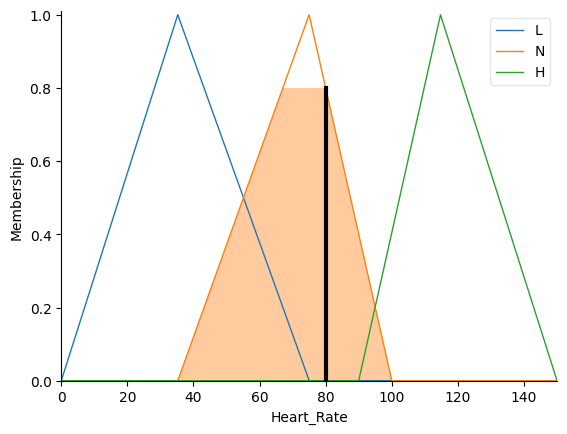

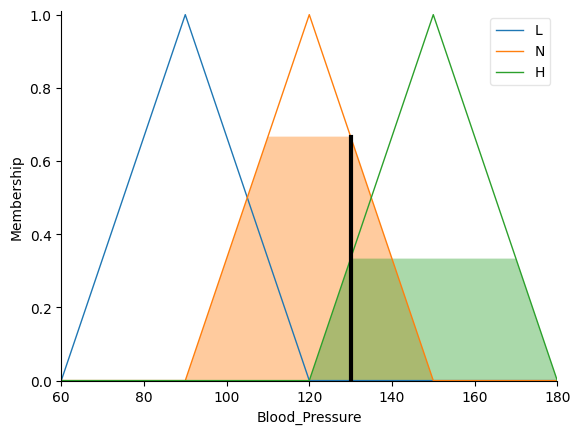

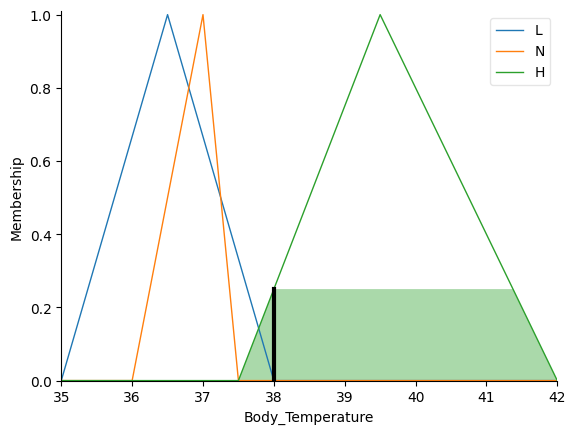

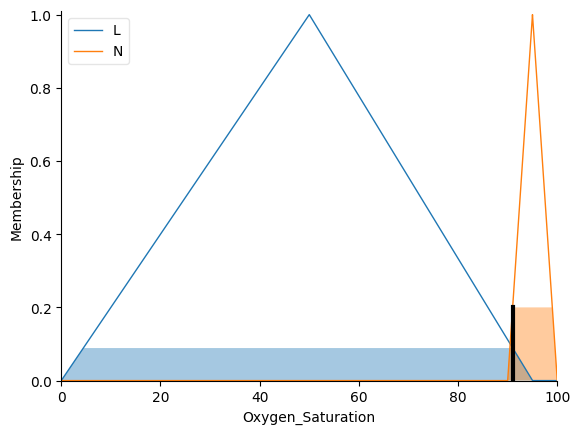

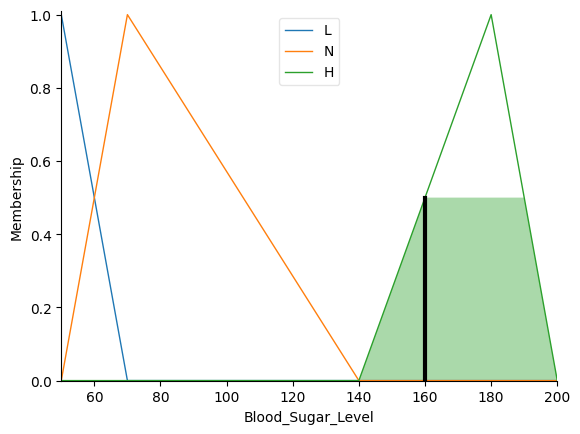

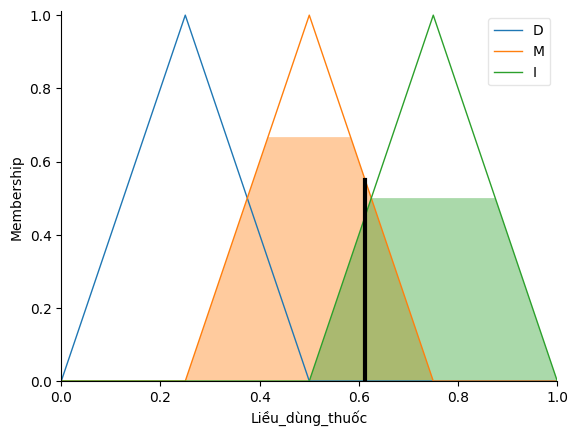

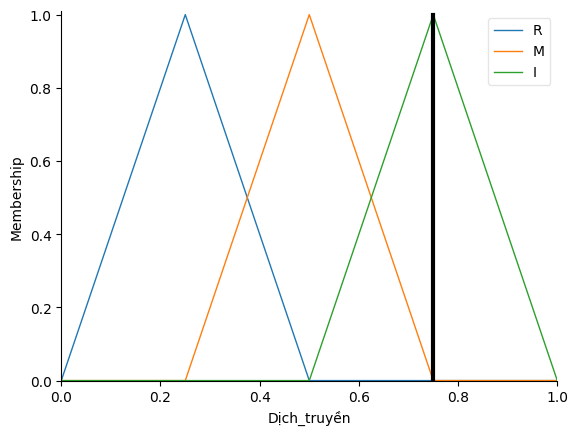

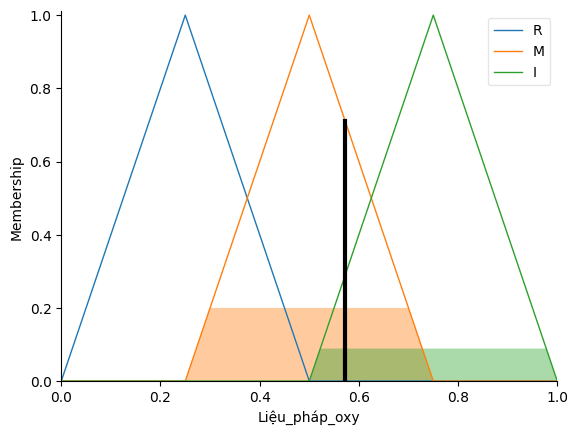

In [21]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#VD 2.8

#input
Heart_Rate = ctrl.Antecedent(np.arange(0, 150.1, 0.01), 'Heart_Rate')
Blood_Pressure = ctrl.Antecedent(np.arange(60, 180.1, 0.1), 'Blood_Pressure')
Body_Temperature = ctrl.Antecedent(np.arange(35, 42.01, 0.01), 'Body_Temperature')
Oxygen_Saturation = ctrl.Antecedent(np.arange(0, 100.01, 0.01), 'Oxygen_Saturation')
Blood_Sugar_Level = ctrl.Antecedent(np.arange(50, 200.1, 0.1), 'Blood_Sugar_Level')

#output
Liều_dùng_thuốc = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'Liều_dùng_thuốc')
Dịch_truyền = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'Dịch_truyền')
Liệu_pháp_oxy = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'Liệu_pháp_oxy')

#phân tích giá trị
Heart_Rate['L'] = fuzz.trimf(Heart_Rate.universe, [0, 35.25, 75])
Heart_Rate['N'] = fuzz.trimf(Heart_Rate.universe, [35.25, 75, 100])
Heart_Rate['H'] = fuzz.trimf(Heart_Rate.universe, [90, 114.75, 150])

Blood_Pressure['L'] = fuzz.trimf(Blood_Pressure.universe, [60, 90, 120])
Blood_Pressure['N'] = fuzz.trimf(Blood_Pressure.universe, [90, 120, 150])
Blood_Pressure['H'] = fuzz.trimf(Blood_Pressure.universe, [120, 150, 180])

Body_Temperature['L'] = fuzz.trimf(Body_Temperature.universe, [35, 36.5, 38])
Body_Temperature['N'] = fuzz.trimf(Body_Temperature.universe, [36, 37, 37.5])
Body_Temperature['H'] = fuzz.trimf(Body_Temperature.universe, [37.5, 39.5, 42])

Oxygen_Saturation['L'] = fuzz.trimf(Oxygen_Saturation.universe, [0, 50, 95])
Oxygen_Saturation['N'] = fuzz.trimf(Oxygen_Saturation.universe, [90, 95, 100])

Blood_Sugar_Level['L'] = fuzz.trimf(Blood_Sugar_Level.universe, [0, 50, 70])
Blood_Sugar_Level['N'] = fuzz.trimf(Blood_Sugar_Level.universe, [50, 70, 140])
Blood_Sugar_Level['H'] = fuzz.trimf(Blood_Sugar_Level.universe, [140, 180, 200])

Liều_dùng_thuốc['D'] = fuzz.trimf(Liều_dùng_thuốc.universe, [0, 0.25, 0.5])
Liều_dùng_thuốc['M'] = fuzz.trimf(Liều_dùng_thuốc.universe, [0.25, 0.5, 0.75])
Liều_dùng_thuốc['I'] = fuzz.trimf(Liều_dùng_thuốc.universe, [0.5, 0.75, 1])

Dịch_truyền['R'] = fuzz.trimf(Dịch_truyền.universe, [0, 0.25, 0.5])
Dịch_truyền['M'] = fuzz.trimf(Dịch_truyền.universe, [0.25, 0.5, 0.75])
Dịch_truyền['I'] = fuzz.trimf(Dịch_truyền.universe, [0.5, 0.75, 1])

Liệu_pháp_oxy['R'] = fuzz.trimf(Liệu_pháp_oxy.universe, [0, 0.25, 0.5])
Liệu_pháp_oxy['M'] = fuzz.trimf(Liệu_pháp_oxy.universe, [0.25, 0.5, 0.75])
Liệu_pháp_oxy['I'] = fuzz.trimf(Liệu_pháp_oxy.universe, [0.5, 0.75, 1])

rule1 = ctrl.Rule(Heart_Rate['L'] & Blood_Pressure['L'],
                  (Dịch_truyền['I'], Liều_dùng_thuốc['I']))
rule2 = ctrl.Rule(Heart_Rate['H'] & Blood_Pressure['H'],
                  Liều_dùng_thuốc['D'])
rule3 = ctrl.Rule(Heart_Rate['N'] & Blood_Pressure['N'],
                  Liều_dùng_thuốc['M'])

rule4 = ctrl.Rule(Body_Temperature['H'] & Oxygen_Saturation['L'],
                  (Liệu_pháp_oxy['I'], Liều_dùng_thuốc['I']))
rule5 = ctrl.Rule(Body_Temperature['N'] & Oxygen_Saturation['N'],
                  Liều_dùng_thuốc['M'])
rule6 = ctrl.Rule(Body_Temperature['L'] & Oxygen_Saturation['L'],
                  (Liệu_pháp_oxy['I'], Dịch_truyền['I']))

rule7 = ctrl.Rule(Blood_Sugar_Level['H'],
                  Liều_dùng_thuốc['I'])
rule8 = ctrl.Rule(Blood_Sugar_Level['L'],
                  (Liều_dùng_thuốc['D'], Dịch_truyền['I']))
rule9 = ctrl.Rule(Blood_Sugar_Level['N'],
                  Liều_dùng_thuốc['M'])

rule10 = ctrl.Rule(Blood_Pressure['H'] & Blood_Sugar_Level['H'] & Heart_Rate['H'],
                   Liều_dùng_thuốc['D'])
rule11 = ctrl.Rule(Blood_Pressure['L'] & Oxygen_Saturation['L'] & Heart_Rate['L'],
                   (Dịch_truyền['I'], Liệu_pháp_oxy['I'], Liều_dùng_thuốc['I']))
rule12 = ctrl.Rule(Body_Temperature['H'] & Blood_Pressure['H'] & Oxygen_Saturation['N'],
                   (Liều_dùng_thuốc['I'], Liệu_pháp_oxy['M']))

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7,rule8,rule9,rule10,rule11,rule12])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)


fuzzy_system.input['Heart_Rate'] = 80
fuzzy_system.input['Blood_Pressure'] = 130
fuzzy_system.input['Body_Temperature'] = 38
fuzzy_system.input['Oxygen_Saturation'] = 91
fuzzy_system.input['Blood_Sugar_Level'] = 160

fuzzy_system.compute()
print(f"Liều dùng thuốc: {fuzzy_system.output['Liều_dùng_thuốc']}")
print(f"Dịch truyền: {fuzzy_system.output['Dịch_truyền']}")

Heart_Rate.view(sim=fuzzy_system)
Blood_Pressure.view(sim=fuzzy_system)
Body_Temperature.view(sim=fuzzy_system)
Oxygen_Saturation.view(sim=fuzzy_system)
Blood_Sugar_Level.view(sim=fuzzy_system)
Liều_dùng_thuốc.view(sim=fuzzy_system)
Dịch_truyền.view(sim=fuzzy_system)
Liệu_pháp_oxy.view(sim=fuzzy_system)


Sentiment_Label: 0.5


np.float64(0.5)

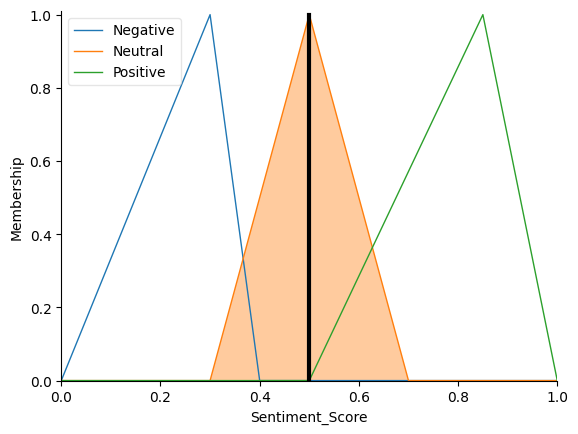

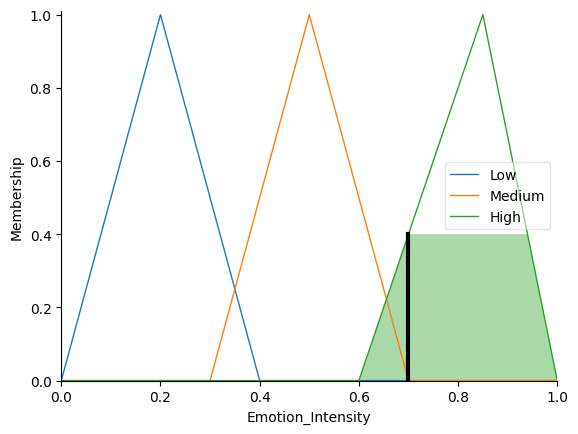

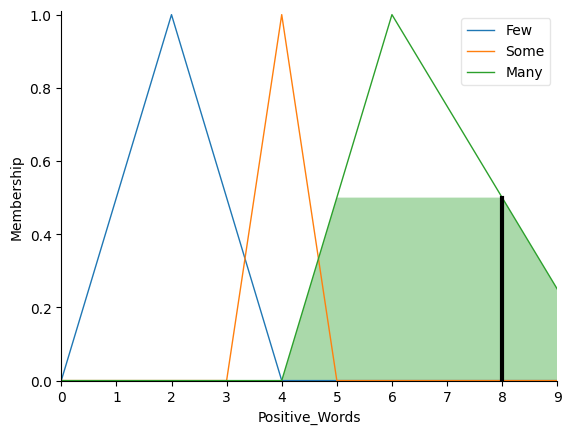

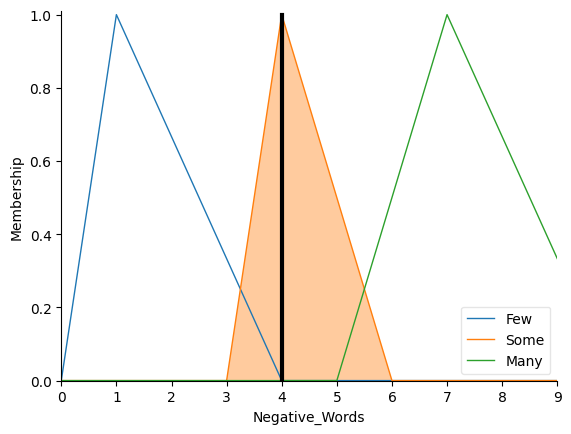

In [ ]:
#VD 2.9
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#input
Sentiment_Score = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'Sentiment_Score')
Emotion_Intensity = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'Emotion_Intensity')
Positive_Words = ctrl.Antecedent(np.arange(0, 10, 1), 'Positive_Words')
Negative_Words = ctrl.Antecedent(np.arange(0, 10, 1), 'Negative_Words')

#output
Sentiment_Label = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'Sentiment_Label')

#phân tích giá trị
Sentiment_Score['Negative'] = fuzz.trimf(Sentiment_Score.universe, [0, 0.3, 0.4])
Sentiment_Score['Neutral'] = fuzz.trimf(Sentiment_Score.universe, [0.3, 0.5, 0.7])
Sentiment_Score['Positive'] = fuzz.trimf(Sentiment_Score.universe, [0.5, 0.85, 1])

Emotion_Intensity['Low'] = fuzz.trimf(Emotion_Intensity.universe, [0, 0.2, 0.4])
Emotion_Intensity['Medium'] = fuzz.trimf(Emotion_Intensity.universe, [0.3, 0.5, 0.7])
Emotion_Intensity['High'] = fuzz.trimf(Emotion_Intensity.universe, [0.6, 0.85, 1])

Positive_Words['Few'] = fuzz.trimf(Positive_Words.universe, [0, 2, 4])
Positive_Words['Some'] = fuzz.trimf(Positive_Words.universe, [3, 4, 5])
Positive_Words['Many'] = fuzz.trimf(Positive_Words.universe, [4, 6, 10])

Negative_Words['Few'] = fuzz.trimf(Negative_Words.universe, [0, 1, 4])
Negative_Words['Some'] = fuzz.trimf(Negative_Words.universe, [3, 4, 6])
Negative_Words['Many'] = fuzz.trimf(Negative_Words.universe, [5, 7, 10])

Sentiment_Label['Negative'] = fuzz.trimf(Sentiment_Label.universe, [0, 0.15, 0.3])
Sentiment_Label['Neutral'] = fuzz.trimf(Sentiment_Label.universe, [0.3, 0.5, 0.7])
Sentiment_Label['Positive'] = fuzz.trimf(Sentiment_Label.universe, [0.7, 0.85, 1])

#rule
rule1 = ctrl.Rule(Sentiment_Score['Negative'] & Emotion_Intensity['High'], Sentiment_Label['Negative'])
rule2 = ctrl.Rule(Sentiment_Score['Negative'] & Emotion_Intensity['Low'], Sentiment_Label['Neutral'])
rule3 = ctrl.Rule(Sentiment_Score['Neutral'] & Emotion_Intensity['Medium'], Sentiment_Label['Neutral'])
rule4 = ctrl.Rule(Sentiment_Score['Positive'] & Emotion_Intensity['High'], Sentiment_Label['Positive'])

rule5 = ctrl.Rule(Positive_Words['Many'] & Negative_Words['Few'], Sentiment_Label['Positive'])
rule6 = ctrl.Rule(Positive_Words['Few'] & Negative_Words['Many'], Sentiment_Label['Negative'])
rule7 = ctrl.Rule(Positive_Words['Some'] & Negative_Words['Some'], Sentiment_Label['Neutral'])

rule8 = ctrl.Rule(Sentiment_Score['Negative'] & Negative_Words['Many'] & Emotion_Intensity['High'], Sentiment_Label['Negative'])
rule9 = ctrl.Rule(Sentiment_Score['Neutral'] & Emotion_Intensity['Medium'] & Positive_Words['Some'], Sentiment_Label['Neutral'])
rule10 = ctrl.Rule(Sentiment_Score['Positive'] & Positive_Words['Many'] & Emotion_Intensity['High'], Sentiment_Label['Positive'])

sentiment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
sentiment_simulation = ctrl.ControlSystemSimulation(sentiment_ctrl)

sentiment_simulation.input['Sentiment_Score'] = 0.5
sentiment_simulation.input['Emotion_Intensity'] = 0.7
sentiment_simulation.input['Positive_Words'] = 8
sentiment_simulation.input['Negative_Words'] = 4

sentiment_simulation.compute()
Sentiment_Label=sentiment_simulation.output['Sentiment_Label']

print(f"Sentiment_Label: {sentiment_simulation.output['Sentiment_Label']}")
Sentiment_Score.view(sim=sentiment_simulation)
Emotion_Intensity.view(sim=sentiment_simulation)
Positive_Words.view(sim=sentiment_simulation)
Negative_Words.view(sim=sentiment_simulation)
Sentiment_Label.view()

Thời gian dự kiến: 13.366666666666676
Thưởng: 51.666666666666686
Đánh giá: 4.402874564459933


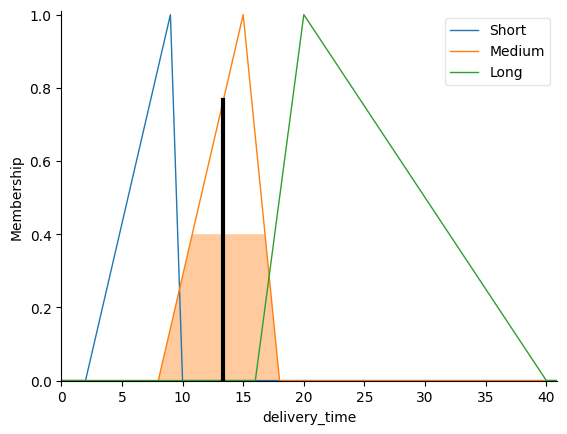

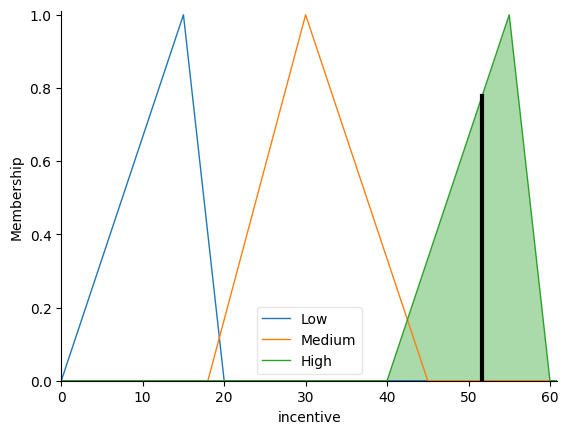

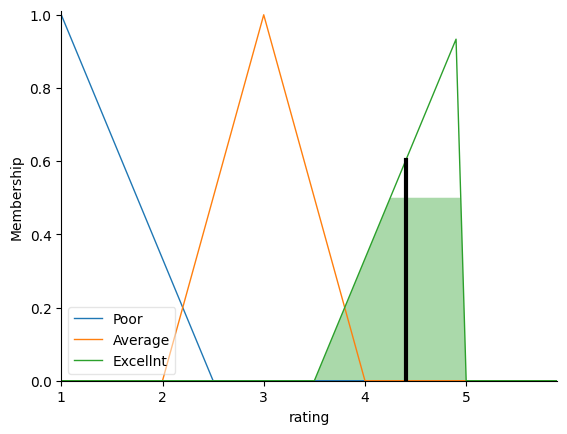

In [ ]:
#VD2.10
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
traffic_condition= ctrl.Antecedent(np.arange(0,11,0.1),'traffic_condition')
distance=ctrl.Antecedent(np.arange(0,20,0.5),'distance')
weather_condition=ctrl.Antecedent(np.arange(0,3,0.1),'weather_condition')
order_preparation_time= ctrl.Antecedent(np.arange(0,26,0.1),'order_preparation_time')
fatigue=ctrl.Antecedent(np.arange(0,11,0.1),'fatigue')
#output
delivery_time=ctrl.Consequent(np.arange(0,41,0.1),'delivery_time')
incentive=ctrl.Consequent(np.arange(0,61,0.1),'incentive')
rating = ctrl.Consequent(np.arange(1, 6, 0.1), 'rating')
#giao thong
traffic_condition['Low']=fuzz.trimf(traffic_condition.universe,[0,0,2.5])
traffic_condition['Medium']=fuzz.trimf(traffic_condition.universe,[2.5,5,7.5])
traffic_condition['High']=fuzz.trimf(traffic_condition.universe,[5,7.5,10])
#quang duong
distance['Short']=fuzz.trimf(distance.universe,[0,2.5,5])
distance['Medium']=fuzz.trimf(distance.universe,[3,8,15])
distance['Long']=fuzz.trimf(distance.universe,[9,17,20])
#thoi tiet
weather_condition['Clear']=fuzz.trimf(weather_condition.universe,[0.2,0.3,0.5])
weather_condition['Rainy']=fuzz.trimf(weather_condition.universe,[0.4,1,1.5])
weather_condition['Stormy']=fuzz.trimf(weather_condition.universe,[1,2,2])
#thoi gian chuan bi
order_preparation_time['Fast']=fuzz.trimf(order_preparation_time.universe,[0,5,6.25])
order_preparation_time['Medium']=fuzz.trimf(order_preparation_time.universe,[6.25,12.5,17.5])
order_preparation_time['Low']=fuzz.trimf(order_preparation_time.universe,[16,25,25])
#do met moi
fatigue['Low']=fuzz.trimf(fatigue.universe,[0,2,4])
fatigue['Medium']=fuzz.trimf(fatigue.universe,[3,5,7])
fatigue['High']=fuzz.trimf(fatigue.universe,[6,8,10])
#thoi gian giao hang
delivery_time['Short']=fuzz.trimf(delivery_time.universe,[2,9,10])
delivery_time['Medium']=fuzz.trimf(delivery_time.universe,[8,15,18])
delivery_time['Long']=fuzz.trimf(delivery_time.universe,[16,20,40])
#tien boa
incentive['Low']=fuzz.trimf(incentive.universe,[0,15,20])
incentive['Medium']=fuzz.trimf(incentive.universe,[18,30,45])
incentive['High']=fuzz.trimf(incentive.universe,[40,55,60])
#Danh gia
rating['Poor']=fuzz.trimf(rating.universe,[1,1,2.5])
rating['Average']=fuzz.trimf(rating.universe,[2,3,4])
rating['Excellnt']=fuzz.trimf(rating.universe,[3.5,5,5])

rule1=ctrl.Rule(traffic_condition['Low'] & distance['Short'],delivery_time['Short'])
rule2=ctrl.Rule(traffic_condition['Medium'] & distance['Medium'],delivery_time['Medium'])
rule3=ctrl.Rule(traffic_condition['High'] & distance['Long'],delivery_time['Long'])

rule4=ctrl.Rule(weather_condition['Clear'],incentive['Low'])
rule5=ctrl.Rule(weather_condition['Rainy'],incentive['Medium'])
rule6=ctrl.Rule(weather_condition['Stormy'],incentive['High'])

rule7=ctrl.Rule(order_preparation_time['Fast'] & traffic_condition['Low'],delivery_time['Short'])
rule8=ctrl.Rule(order_preparation_time['Medium'] & traffic_condition['Medium'],delivery_time['Medium'])
rule9=ctrl.Rule(order_preparation_time['Low'] & traffic_condition['High'],delivery_time['Long'])
rule10=ctrl.Rule(fatigue['High'],rating['Poor'])
rule11=ctrl.Rule(distance['Long'] & weather_condition['Stormy'] & traffic_condition['High'],(delivery_time['Long'],incentive['High']))
rule12=ctrl.Rule(distance['Short'] & weather_condition['Clear'] & traffic_condition['Low'],(delivery_time['Short'],incentive['Low']))
rule13=ctrl.Rule(fatigue['High']& traffic_condition['High'],(rating['Poor'],delivery_time['Long']))
rule14=ctrl.Rule(fatigue['Low'],rating['Excellnt'])
rule15=ctrl.Rule(fatigue['Medium'],rating['Average'])
rule16=ctrl.Rule(fatigue['High'],rating['Poor'])
delivery_time_simulation=ctrl.ControlSystem([rule1,rule2,rule3,rule7,rule8,rule9,rule11,rule12,rule13])
incentive_simulation=ctrl.ControlSystem([rule4,rule5,rule6,rule11,rule12])
rating_simulation = ctrl.ControlSystem([rule14, rule15, rule16])
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15,rule16])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['traffic_condition'] = 5
fuzzy_system.input['distance'] = 5
fuzzy_system.input['weather_condition'] = 2
fuzzy_system.input['order_preparation_time'] = 7
fuzzy_system.input['fatigue'] = 1

fuzzy_system.compute()

print(f"Thời gian dự kiến: {fuzzy_system.output['delivery_time']}")
print(f"Thưởng: {fuzzy_system.output['incentive']}")
print(f"Đánh giá: {fuzzy_system.output['rating']}")

delivery_time.view(sim=fuzzy_system)
incentive.view(sim=fuzzy_system)
rating.view(sim=fuzzy_system)

Giá cuối cùng đề xuất: 2.0000000000000004


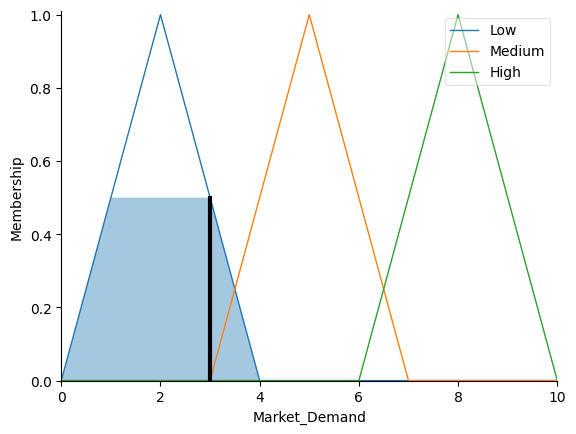

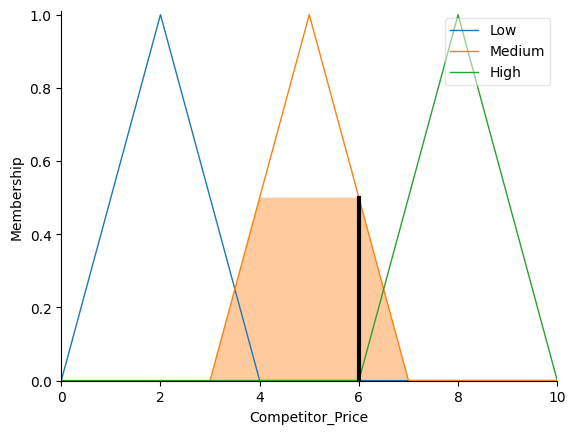

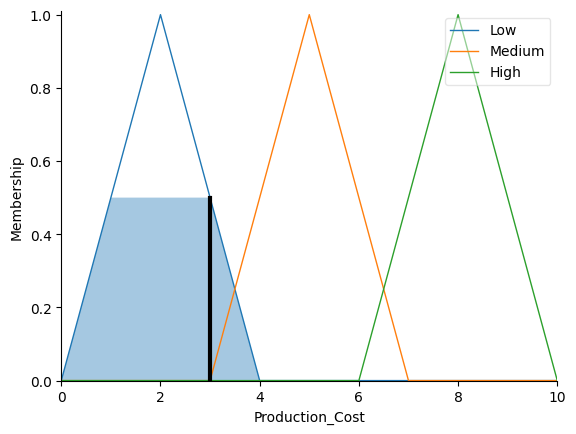

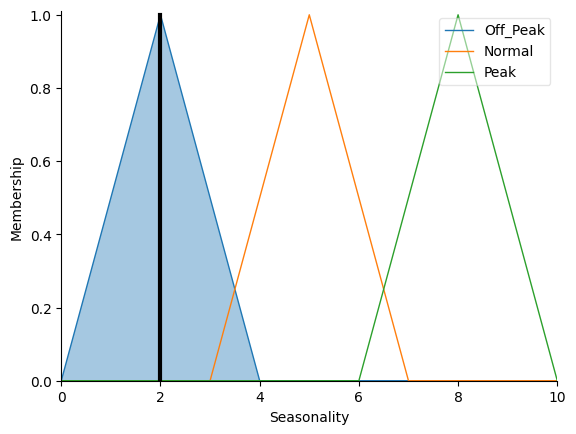

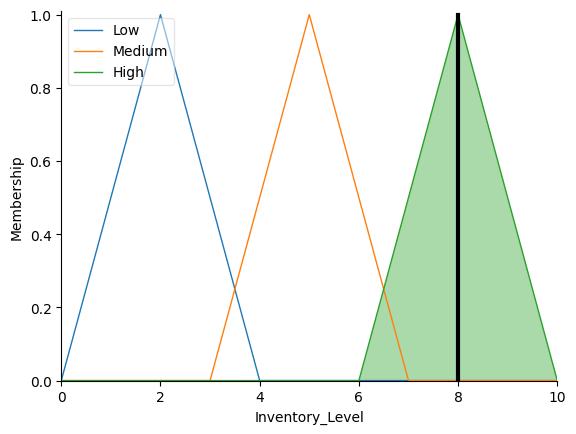

In [ ]:
#VD2.11
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#input
Market_Demand = ctrl.Antecedent(np.arange(0, 11, 1), 'Market_Demand')
Competitor_Price = ctrl.Antecedent(np.arange(0, 11, 1), 'Competitor_Price')
Production_Cost = ctrl.Antecedent(np.arange(0, 11, 1), 'Production_Cost')
Seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'Seasonality')
Inventory_Level = ctrl.Antecedent(np.arange(0, 11, 1), 'Inventory_Level')

#output
Final_Price = ctrl.Consequent(np.arange(0, 11, 1), 'Final_Price')

#phân tích giá trị
Market_Demand['Low'] = fuzz.trimf(Market_Demand.universe, [0, 2, 4])
Market_Demand['Medium'] = fuzz.trimf(Market_Demand.universe, [3, 5, 7])
Market_Demand['High'] = fuzz.trimf(Market_Demand.universe, [6, 8, 10])

Competitor_Price['Low'] = fuzz.trimf(Competitor_Price.universe, [0, 2, 4])
Competitor_Price['Medium'] = fuzz.trimf(Competitor_Price.universe, [3, 5, 7])
Competitor_Price['High'] = fuzz.trimf(Competitor_Price.universe, [6, 8, 10])

Production_Cost['Low'] = fuzz.trimf(Production_Cost.universe, [0, 2, 4])
Production_Cost['Medium'] = fuzz.trimf(Production_Cost.universe, [3, 5, 7])
Production_Cost['High'] = fuzz.trimf(Production_Cost.universe, [6, 8, 10])

Seasonality['Off_Peak'] = fuzz.trimf(Seasonality.universe, [0, 2, 4])
Seasonality['Normal'] = fuzz.trimf(Seasonality.universe, [3, 5, 7])
Seasonality['Peak'] = fuzz.trimf(Seasonality.universe, [6, 8, 10])

Inventory_Level['Low'] = fuzz.trimf(Inventory_Level.universe, [0, 2, 4])
Inventory_Level['Medium'] = fuzz.trimf(Inventory_Level.universe, [3, 5, 7])
Inventory_Level['High'] = fuzz.trimf(Inventory_Level.universe, [6, 8, 10])

Final_Price['Very_Low'] = fuzz.trimf(Final_Price.universe, [0, 1, 2])
Final_Price['Low'] = fuzz.trimf(Final_Price.universe, [2, 3, 4])
Final_Price['Medium'] = fuzz.trimf(Final_Price.universe, [4, 5, 6])
Final_Price['High'] = fuzz.trimf(Final_Price.universe, [6, 7, 8])
Final_Price['Very_High'] = fuzz.trimf(Final_Price.universe, [8, 9, 10])

#rule
rules = [
    ctrl.Rule(Market_Demand['High'] & Competitor_Price['High'] & Inventory_Level['Low'], Final_Price['Very_High']),
    ctrl.Rule(Market_Demand['High'] & Seasonality['Peak'] & Inventory_Level['Low'], Final_Price['Very_High']),
    ctrl.Rule(Market_Demand['Medium'] & Production_Cost['High'] & Inventory_Level['Low'], Final_Price['Very_High']),

    ctrl.Rule(Market_Demand['High'] & Competitor_Price['Medium'] & Inventory_Level['Medium'], Final_Price['High']),
    ctrl.Rule(Market_Demand['Medium'] & Competitor_Price['High'] & Inventory_Level['Low'], Final_Price['High']),
    ctrl.Rule(Market_Demand['Medium'] & Seasonality['Peak'] & Inventory_Level['Medium'], Final_Price['High']),

    ctrl.Rule(Market_Demand['Medium'] & Competitor_Price['Medium'] & Inventory_Level['Medium'], Final_Price['Medium']),
    ctrl.Rule(Market_Demand['Medium'] & Competitor_Price['High'] & Inventory_Level['Medium'], Final_Price['Medium']),
    ctrl.Rule(Market_Demand['Low'] & Competitor_Price['High'] & Inventory_Level['Medium'], Final_Price['Medium']),
    ctrl.Rule(Market_Demand['Medium'] & Production_Cost['Medium'] & Inventory_Level['Medium'], Final_Price['Medium']),

    ctrl.Rule(Market_Demand['Low'] & Competitor_Price['Low'] & Inventory_Level['High'], Final_Price['Low']),
    ctrl.Rule(Market_Demand['Medium'] & Production_Cost['Medium'] & Inventory_Level['High'], Final_Price['Low']),
    ctrl.Rule(Market_Demand['Low'] & Seasonality['Off_Peak'] & Inventory_Level['High'], Final_Price['Low']),

    ctrl.Rule(Market_Demand['Low'] & Competitor_Price['Low'] & Inventory_Level['High'], Final_Price['Very_Low']),
    ctrl.Rule(Market_Demand['Low'] & Seasonality['Off_Peak'] & Inventory_Level['High'], Final_Price['Very_Low']),
    ctrl.Rule(Market_Demand['Medium'] & Competitor_Price['Low'] & Inventory_Level['High'], Final_Price['Very_Low'])
]


pricing_ctrl = ctrl.ControlSystem(rules)
pricing_simulation = ctrl.ControlSystemSimulation(pricing_ctrl)


pricing_simulation.input['Market_Demand'] = 3
pricing_simulation.input['Competitor_Price'] = 6
pricing_simulation.input['Production_Cost'] = 3
pricing_simulation.input['Seasonality'] = 2
pricing_simulation.input['Inventory_Level'] = 8


pricing_simulation.compute()


print("Giá cuối cùng đề xuất:", pricing_simulation.output['Final_Price'])

Market_Demand.view(sim=pricing_simulation)
Competitor_Price.view(sim=pricing_simulation)
Production_Cost.view(sim=pricing_simulation)
Seasonality.view(sim=pricing_simulation)
Inventory_Level.view(sim=pricing_simulation)

Giá đi xe đề xuất: 24.999999999999805
Điểm thưởng khách hàng: 50.00000000000003


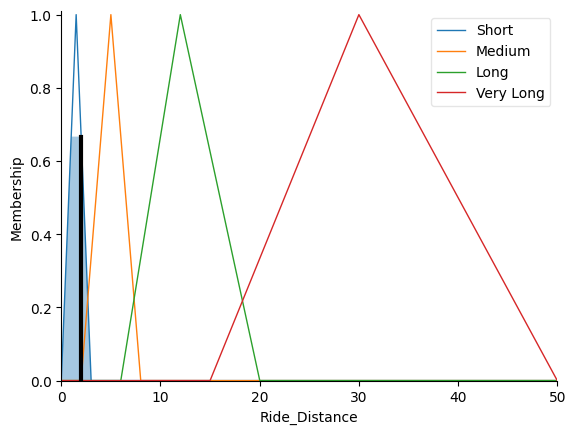

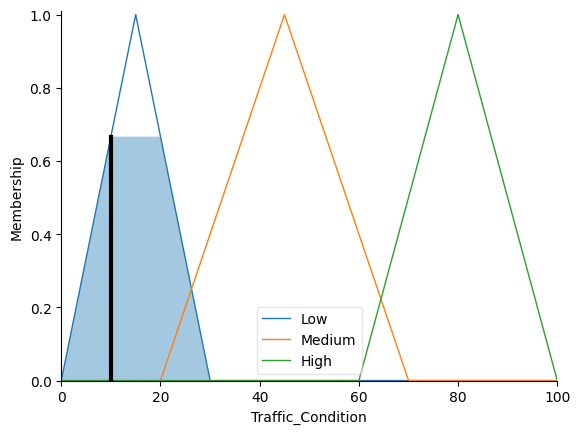

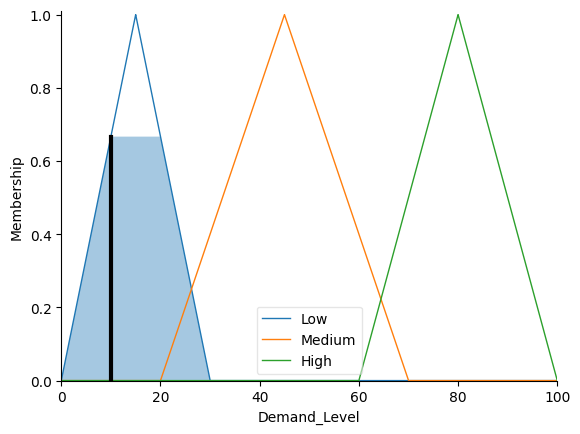

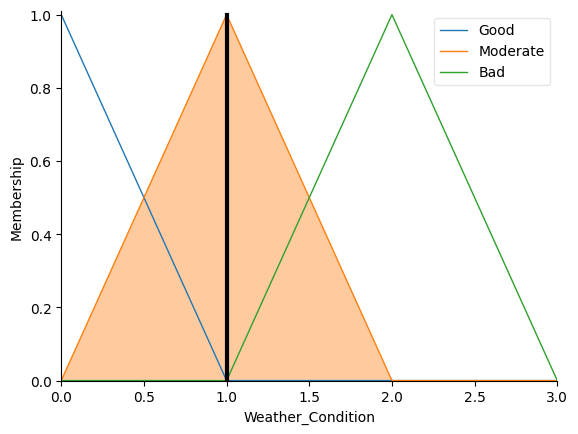

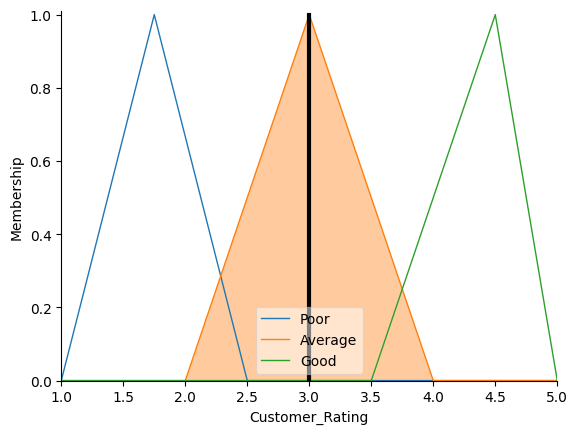

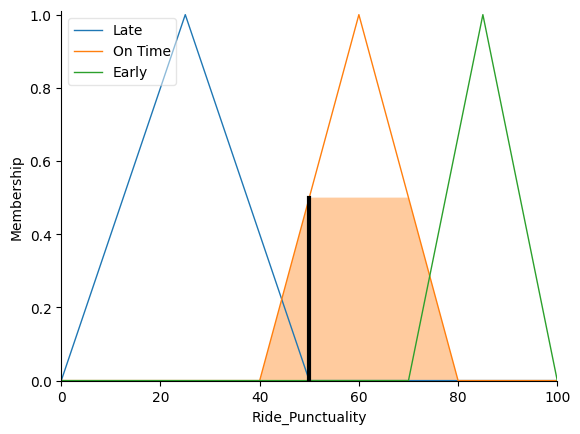

In [ ]:
# BT 1
#input
Ride_Distance = ctrl.Antecedent(np.arange(0, 50.01, 0.01), 'Ride_Distance')
Traffic_Condition = ctrl.Antecedent(np.arange(0, 100.01, 0.01), 'Traffic_Condition')
Demand_Level = ctrl.Antecedent(np.arange(0, 100.01, 0.01), 'Demand_Level')
Weather_Condition = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'Weather_Condition')
Customer_Rating = ctrl.Antecedent(np.arange(1.0, 5.01, 0.01), 'Customer_Rating')
Ride_Punctuality = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'Ride_Punctuality')

#output
Ride_Price = ctrl.Consequent(np.arange(0, 100.01, 0.01), 'Ride_Price')
Customer_Reward = ctrl.Consequent(np.arange(0, 100.01, 0.01), 'Customer_Reward')

#phân tích giá trị
Ride_Distance['Short'] = fuzz.trimf(Ride_Distance.universe, [0, 1.5, 3])
Ride_Distance['Medium'] = fuzz.trimf(Ride_Distance.universe, [2, 5, 8])
Ride_Distance['Long'] = fuzz.trimf(Ride_Distance.universe, [6, 12, 20])
Ride_Distance['Very Long'] = fuzz.trimf(Ride_Distance.universe, [15, 30, 50])

Traffic_Condition['Low'] = fuzz.trimf(Traffic_Condition.universe, [0, 15, 30])
Traffic_Condition['Medium'] = fuzz.trimf(Traffic_Condition.universe, [20, 45, 70])
Traffic_Condition['High'] = fuzz.trimf(Traffic_Condition.universe, [60, 80, 100])

Demand_Level['Low'] = fuzz.trimf(Demand_Level.universe, [0, 15, 30])
Demand_Level['Medium'] = fuzz.trimf(Demand_Level.universe, [20, 45, 70])
Demand_Level['High'] = fuzz.trimf(Demand_Level.universe, [60, 80, 100])

Weather_Condition['Good'] = fuzz.trimf(Weather_Condition.universe, [0, 0, 1])
Weather_Condition['Moderate'] = fuzz.trimf(Weather_Condition.universe, [0, 1, 2])
Weather_Condition['Bad'] = fuzz.trimf(Weather_Condition.universe, [1, 2, 3])

Customer_Rating['Poor'] = fuzz.trimf(Customer_Rating.universe, [1.0, 1.75, 2.5])
Customer_Rating['Average'] = fuzz.trimf(Customer_Rating.universe, [2.0, 3.0, 4.0])
Customer_Rating['Good'] = fuzz.trimf(Customer_Rating.universe, [3.5, 4.5, 5.0])

Ride_Punctuality['Late'] = fuzz.trimf(Ride_Punctuality.universe, [0, 25, 50])
Ride_Punctuality['On Time'] = fuzz.trimf(Ride_Punctuality.universe, [40, 60, 80])
Ride_Punctuality['Early'] = fuzz.trimf(Ride_Punctuality.universe, [70, 85, 100])

Ride_Price['Low'] = fuzz.trimf(Ride_Price.universe, [0, 25, 50])
Ride_Price['Medium'] = fuzz.trimf(Ride_Price.universe, [30, 50, 70])
Ride_Price['High'] = fuzz.trimf(Ride_Price.universe, [60, 75, 90])
Ride_Price['Very High'] = fuzz.trimf(Ride_Price.universe, [80, 90, 100])

Customer_Reward['None'] = fuzz.trimf(Customer_Reward.universe, [0, 0, 20])
Customer_Reward['Few'] = fuzz.trimf(Customer_Reward.universe, [10, 25, 40])
Customer_Reward['Moderate'] = fuzz.trimf(Customer_Reward.universe, [30, 50, 70])
Customer_Reward['High'] = fuzz.trimf(Customer_Reward.universe, [60, 80, 100])

#rule
rule1 = ctrl.Rule(Ride_Distance['Short'] & Traffic_Condition['Low'] & Demand_Level['Low'], Ride_Price['Low'])
rule2 = ctrl.Rule(Ride_Distance['Short'] & Traffic_Condition['Medium'] & Demand_Level['High'], Ride_Price['Medium'])
rule3 = ctrl.Rule(Ride_Distance['Medium'] & Traffic_Condition['High'] & Demand_Level['High'], Ride_Price['High'])
rule4 = ctrl.Rule(Ride_Distance['Long'] & Traffic_Condition['Medium'] & Weather_Condition['Good'], Ride_Price['Medium'])
rule5 = ctrl.Rule(Ride_Distance['Long'] & Traffic_Condition['High'] & Weather_Condition['Bad'], Ride_Price['Very High'])
rule6 = ctrl.Rule(Ride_Distance['Very Long'] & Traffic_Condition['High'] & Demand_Level['High'], Ride_Price['Very High'])

rule11 = ctrl.Rule(Customer_Rating['Good'] & Ride_Punctuality['Early'], Customer_Reward['High'])
rule12 = ctrl.Rule(Customer_Rating['Average'] & Ride_Punctuality['On Time'], Customer_Reward['Moderate'])
rule13 = ctrl.Rule(Customer_Rating['Poor'] & Ride_Punctuality['Late'], Customer_Reward['None'])
rule14 = ctrl.Rule(Ride_Distance['Long'] & Traffic_Condition['High'] & Ride_Punctuality['On Time'], Customer_Reward['High'])
rule15 = ctrl.Rule(Ride_Distance['Very Long'] & Weather_Condition['Bad'] & Customer_Rating['Good'], Customer_Reward['High'])


pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule11, rule12, rule13, rule14, rule15])
pricing_simulation = ctrl.ControlSystemSimulation(pricing_ctrl)

pricing_simulation.input['Ride_Distance'] = 2
pricing_simulation.input['Traffic_Condition'] = 10
pricing_simulation.input['Demand_Level'] = 10
pricing_simulation.input['Weather_Condition'] = 1
pricing_simulation.input['Customer_Rating'] = 3
pricing_simulation.input['Ride_Punctuality'] = 50

pricing_simulation.compute()

print("Giá đi xe đề xuất:", pricing_simulation.output['Ride_Price'])
print("Điểm thưởng khách hàng:", pricing_simulation.output['Customer_Reward'])

Ride_Distance.view(sim=pricing_simulation)
Traffic_Condition.view(sim=pricing_simulation)
Demand_Level.view(sim=pricing_simulation)
Weather_Condition.view(sim=pricing_simulation)
Customer_Rating.view(sim=pricing_simulation)
Ride_Punctuality.view(sim=pricing_simulation)

Mức chiết khấu đề xuất: 20.00%


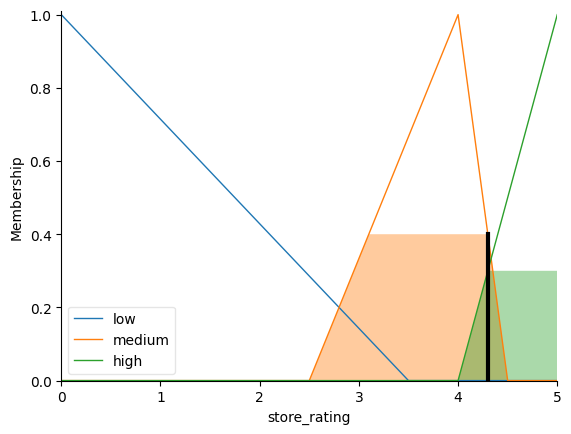

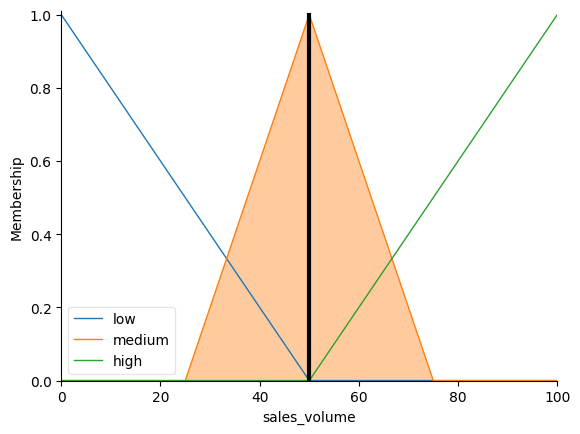

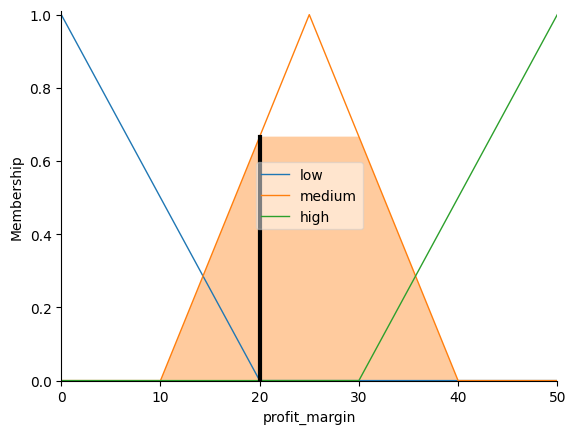

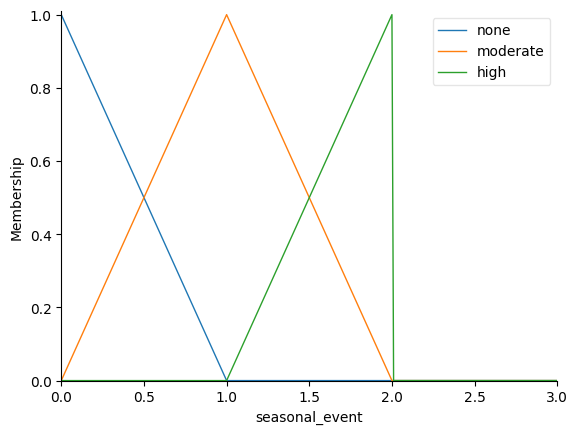

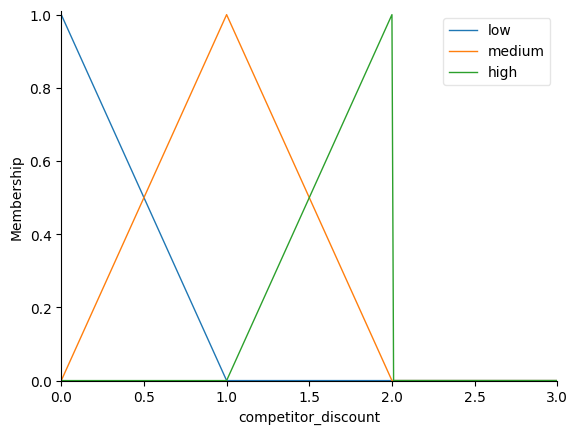

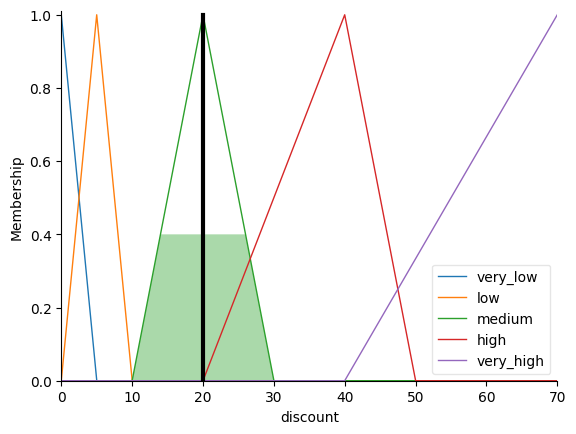

In [ ]:
#BT2

#input
store_rating = ctrl.Antecedent(np.arange(0, 5.01, 0.01), 'store_rating')
sales_volume = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'sales_volume')
profit_margin = ctrl.Antecedent(np.arange(0, 50.1, 0.1), 'profit_margin')
seasonal_event = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'seasonal_event')
competitor_discount = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'competitor_discount')

#output
discount = ctrl.Consequent(np.arange(0, 70.01, 0.01), 'discount')

#phân tích giá trị
store_rating['low'] = fuzz.trimf(store_rating.universe, [0, 0, 3.5])
store_rating['medium'] = fuzz.trimf(store_rating.universe, [2.5, 4, 4.5])
store_rating['high'] = fuzz.trimf(store_rating.universe, [4, 5, 5])

sales_volume['low'] = fuzz.trimf(sales_volume.universe, [0, 0, 50])
sales_volume['medium'] = fuzz.trimf(sales_volume.universe, [25, 50, 75])
sales_volume['high'] = fuzz.trimf(sales_volume.universe, [50, 100, 100])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 20])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [10, 25, 40])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [30, 50, 50])

seasonal_event['none'] = fuzz.trimf(seasonal_event.universe, [0, 0, 1])
seasonal_event['moderate'] = fuzz.trimf(seasonal_event.universe, [0, 1, 2])
seasonal_event['high'] = fuzz.trimf(seasonal_event.universe, [1, 2, 2])

competitor_discount['low'] = fuzz.trimf(competitor_discount.universe, [0, 0, 1])
competitor_discount['medium'] = fuzz.trimf(competitor_discount.universe, [0, 1, 2])
competitor_discount['high'] = fuzz.trimf(competitor_discount.universe, [1, 2, 2])

discount['very_low'] = fuzz.trimf(discount.universe, [0, 0, 5])
discount['low'] = fuzz.trimf(discount.universe, [0, 5, 10])
discount['medium'] = fuzz.trimf(discount.universe, [10, 20, 30])
discount['high'] = fuzz.trimf(discount.universe, [20, 40, 50])
discount['very_high'] = fuzz.trimf(discount.universe, [40, 70, 70])

#rule
rule1 = ctrl.Rule(store_rating['high'] & sales_volume['high'] & profit_margin['high'], discount['very_low'])
rule2 = ctrl.Rule(store_rating['low'] & sales_volume['low'] & profit_margin['high'], discount['high'])
rule3 = ctrl.Rule(seasonal_event['high'] & competitor_discount['high'], discount['very_high'])
rule4 = ctrl.Rule(store_rating['medium'] & sales_volume['medium'] & profit_margin['medium'], discount['medium'])
rule5 = ctrl.Rule(competitor_discount['low'] & profit_margin['low'] & sales_volume['high'], discount['very_low'])
rule6 = ctrl.Rule(store_rating['low'] & seasonal_event['none'], discount['medium'])
rule7 = ctrl.Rule(sales_volume['low'] & profit_margin['low'], discount['very_high'])

pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
pricing_simulation = ctrl.ControlSystemSimulation(pricing_ctrl)

pricing_simulation.input['store_rating'] = 4.3
pricing_simulation.input['sales_volume'] = 50
pricing_simulation.input['profit_margin'] = 20
pricing_simulation.input['seasonal_event'] = 80
pricing_simulation.input['competitor_discount'] = 90


pricing_simulation.compute()


print(f"Mức chiết khấu đề xuất: {pricing_simulation.output['discount']:.2f}%")

store_rating.view(sim=pricing_simulation)
sales_volume.view(sim=pricing_simulation)
profit_margin.view(sim=pricing_simulation)
seasonal_event.view(sim=pricing_simulation)
competitor_discount.view(sim=pricing_simulation)
discount.view(sim=pricing_simulation)

Chiết khấu đề xuất: 2.43%


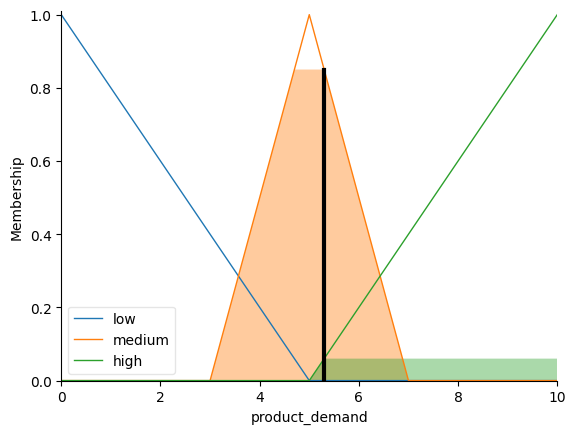

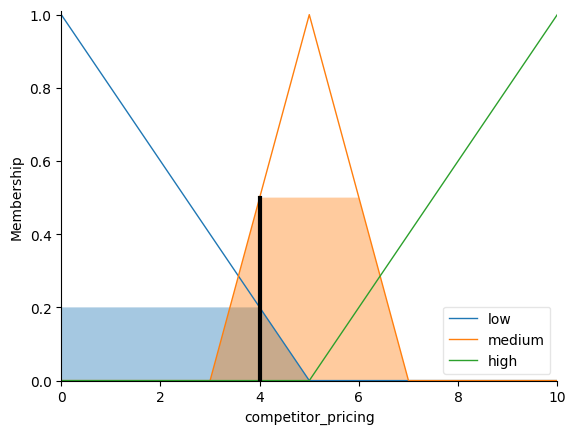

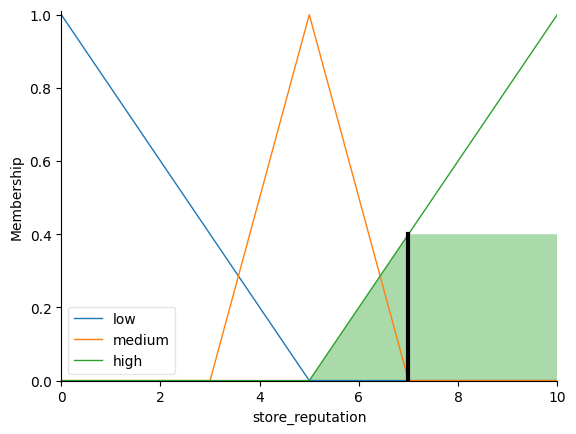

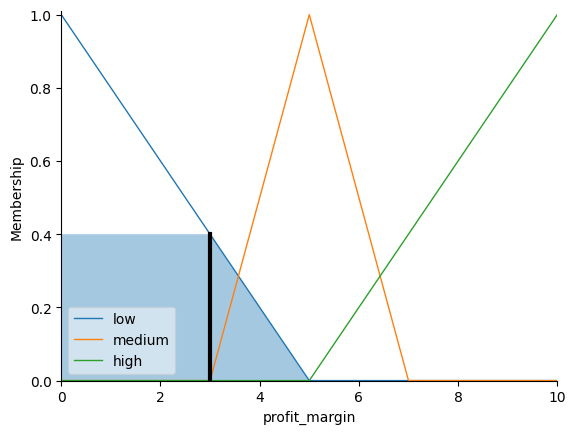

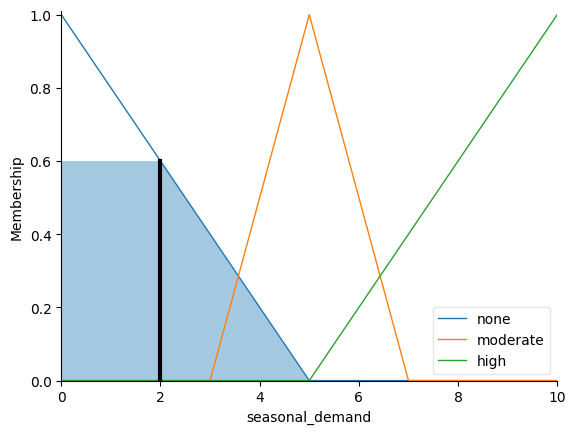

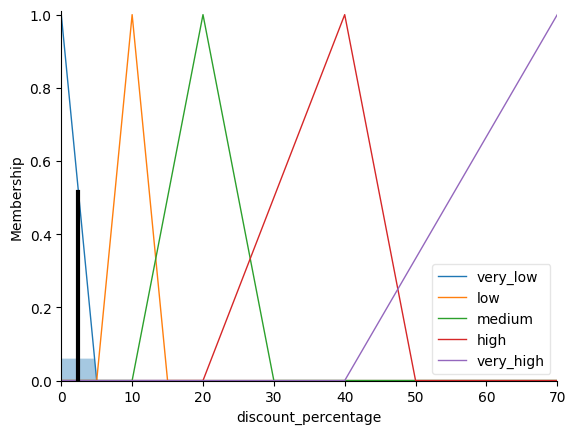

In [6]:
#BT3
#input
product_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'product_demand')
competitor_pricing = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_pricing')
store_reputation = ctrl.Antecedent(np.arange(0, 11, 1), 'store_reputation')
profit_margin = ctrl.Antecedent(np.arange(0, 11, 1), 'profit_margin')
seasonal_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonal_demand')

#output
discount_percentage = ctrl.Consequent(np.arange(0, 71, 1), 'discount_percentage')

#phân tích giá trị
product_demand['low'] = fuzz.trimf(product_demand.universe, [0, 0, 5])
product_demand['medium'] = fuzz.trimf(product_demand.universe, [3, 5, 7])
product_demand['high'] = fuzz.trimf(product_demand.universe, [5, 10, 10])

competitor_pricing['low'] = fuzz.trimf(competitor_pricing.universe, [0, 0, 5])
competitor_pricing['medium'] = fuzz.trimf(competitor_pricing.universe, [3, 5, 7])
competitor_pricing['high'] = fuzz.trimf(competitor_pricing.universe, [5, 10, 10])

store_reputation['low'] = fuzz.trimf(store_reputation.universe, [0, 0, 5])
store_reputation['medium'] = fuzz.trimf(store_reputation.universe, [3, 5, 7])
store_reputation['high'] = fuzz.trimf(store_reputation.universe, [5, 10, 10])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 5])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [3, 5, 7])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [5, 10, 10])

seasonal_demand['none'] = fuzz.trimf(seasonal_demand.universe, [0, 0, 5])
seasonal_demand['moderate'] = fuzz.trimf(seasonal_demand.universe, [3, 5, 7])
seasonal_demand['high'] = fuzz.trimf(seasonal_demand.universe, [5, 10, 10])


discount_percentage['very_low'] = fuzz.trimf(discount_percentage.universe, [0, 0, 5])
discount_percentage['low'] = fuzz.trimf(discount_percentage.universe, [5, 10, 15])
discount_percentage['medium'] = fuzz.trimf(discount_percentage.universe, [10, 20, 30])
discount_percentage['high'] = fuzz.trimf(discount_percentage.universe, [20, 40, 50])
discount_percentage['very_high'] = fuzz.trimf(discount_percentage.universe, [40, 70, 70])

#rule
rule1 = ctrl.Rule(product_demand['high'] & competitor_pricing['low'] & profit_margin['low'], discount_percentage['very_low'])
rule2 = ctrl.Rule(product_demand['low'] & competitor_pricing['high'] & profit_margin['high'], discount_percentage['high'])
rule3 = ctrl.Rule(store_reputation['high'] & profit_margin['medium'] & seasonal_demand['high'], discount_percentage['medium'])
rule4 = ctrl.Rule(competitor_pricing['high'] & seasonal_demand['high'] & profit_margin['high'], discount_percentage['very_high'])
rule5 = ctrl.Rule(store_reputation['low'] & product_demand['medium'] & profit_margin['low'], discount_percentage['medium'])
rule6 = ctrl.Rule(product_demand['high'] & seasonal_demand['none'] & competitor_pricing['low'], discount_percentage['very_low'])
rule7 = ctrl.Rule(profit_margin['high'] & competitor_pricing['medium'] & seasonal_demand['moderate'], discount_percentage['medium'])


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
pricing_simulation = ctrl.ControlSystemSimulation(control_system)


pricing_simulation.input['product_demand'] = 5.3
pricing_simulation.input['competitor_pricing'] = 4
pricing_simulation.input['store_reputation'] = 7
pricing_simulation.input['profit_margin'] = 3
pricing_simulation.input['seasonal_demand'] = 2


pricing_simulation.compute()


print(f"Chiết khấu đề xuất: {pricing_simulation.output['discount_percentage']:.2f}%")

product_demand.view(sim=pricing_simulation)
competitor_pricing.view(sim=pricing_simulation)
store_reputation.view(sim=pricing_simulation)
profit_margin.view(sim=pricing_simulation)
seasonal_demand.view(sim=pricing_simulation)
discount_percentage.view(sim=pricing_simulation)

Số đơn hàng nên kết hợp: 7.74
Mức độ ưu tiên giao hàng: 4.71


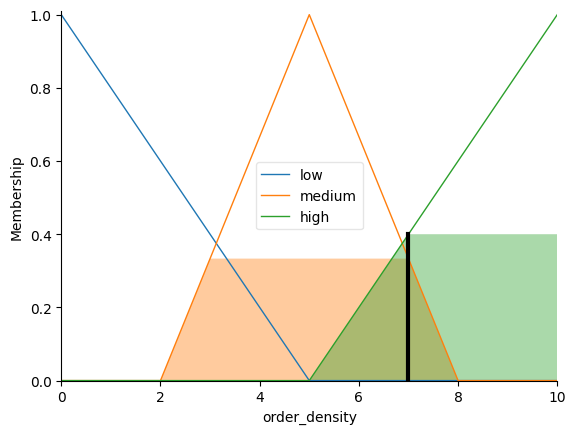

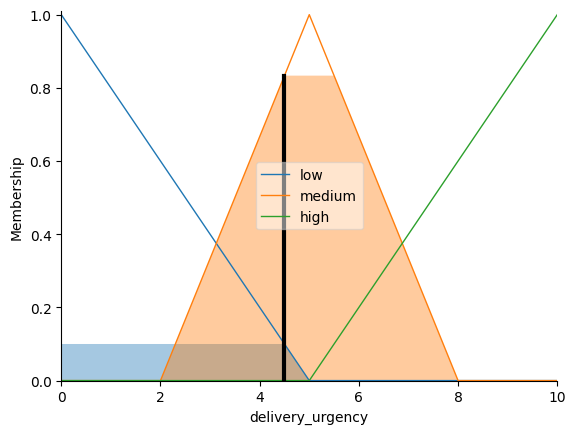

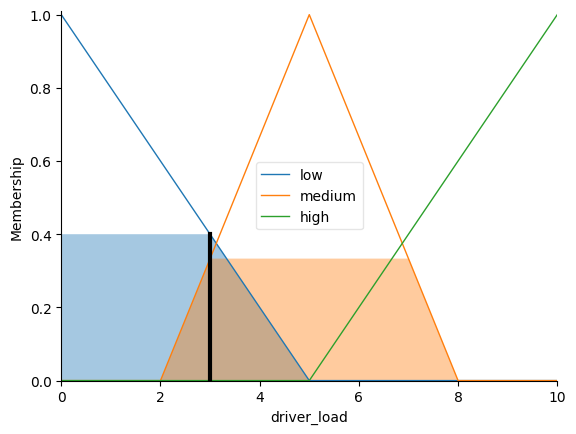

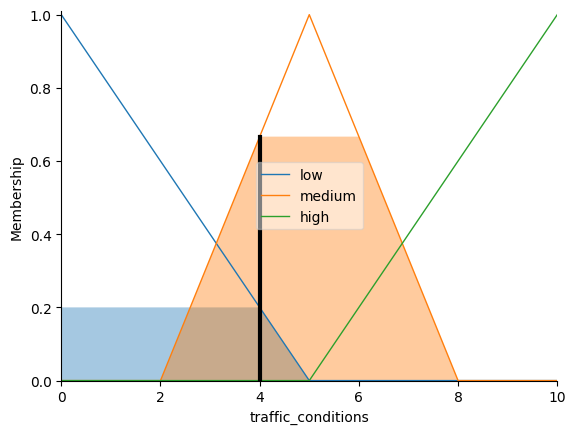

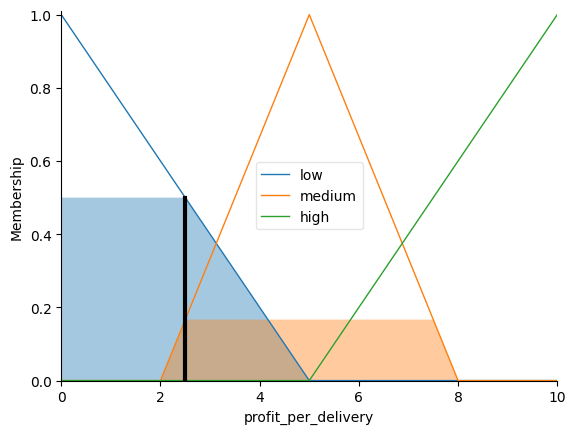

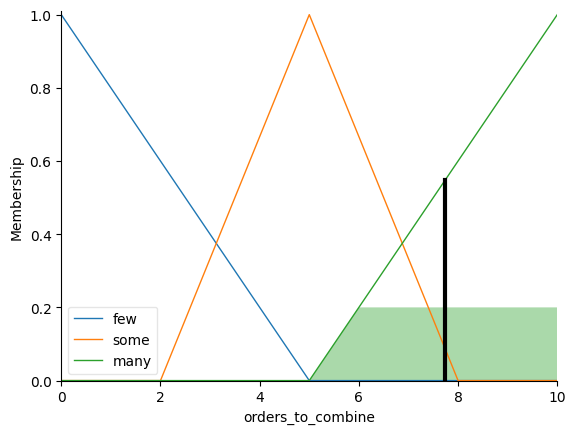

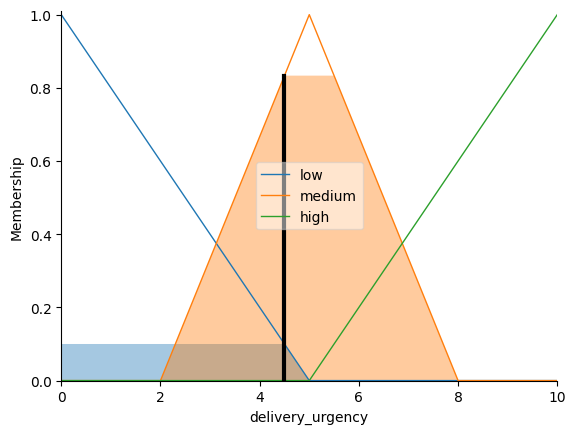

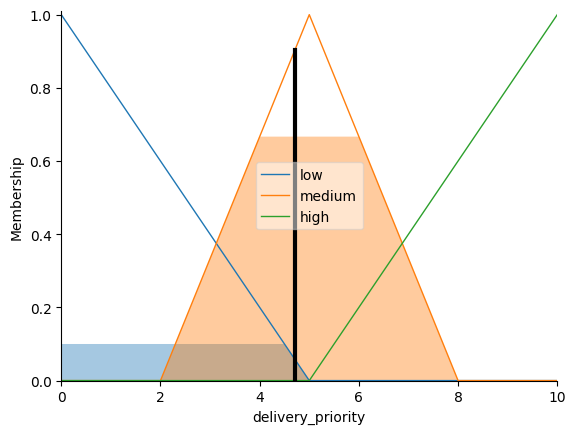

In [10]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

#input
order_density = ctrl.Antecedent(np.arange(0, 10.01, 0.01), 'order_density')
delivery_urgency = ctrl.Antecedent(np.arange(0, 10.01, 0.01), 'delivery_urgency')
driver_load = ctrl.Antecedent(np.arange(0, 10.01, 0.01), 'driver_load')
traffic_conditions = ctrl.Antecedent(np.arange(0, 10.01, 0.01), 'traffic_conditions')
profit_per_delivery = ctrl.Antecedent(np.arange(0, 10.01, 0.01), 'profit_per_delivery')

#output
orders_to_combine = ctrl.Consequent(np.arange(0, 10.01, 0.01), 'orders_to_combine')
delivery_priority = ctrl.Consequent(np.arange(0, 10.01, 0.01), 'delivery_priority')

#phân tích giá trị
for var in [order_density, delivery_urgency, driver_load, traffic_conditions, profit_per_delivery]:
    var['low'] = fuzz.trimf(var.universe, [0, 0, 5])
    var['medium'] = fuzz.trimf(var.universe, [2, 5, 8])
    var['high'] = fuzz.trimf(var.universe, [5, 10, 10])

orders_to_combine['few'] = fuzz.trimf(orders_to_combine.universe, [0, 0, 5])
orders_to_combine['some'] = fuzz.trimf(orders_to_combine.universe, [2, 5, 8])
orders_to_combine['many'] = fuzz.trimf(orders_to_combine.universe, [5, 10, 10])

delivery_priority['low'] = fuzz.trimf(delivery_priority.universe, [0, 0, 5])
delivery_priority['medium'] = fuzz.trimf(delivery_priority.universe, [2, 5, 8])
delivery_priority['high'] = fuzz.trimf(delivery_priority.universe, [5, 10, 10])

#rule
rule1 = ctrl.Rule(order_density['high'] & driver_load['low'] & traffic_conditions['low'], orders_to_combine['many'])
rule2 = ctrl.Rule(order_density['medium'] & traffic_conditions['high'] & delivery_urgency['medium'], orders_to_combine['some'])
rule3 = ctrl.Rule(driver_load['high'] & order_density['high'] & profit_per_delivery['medium'], orders_to_combine['some'])
rule4 = ctrl.Rule(order_density['low'] & delivery_urgency['high'] & traffic_conditions['medium'], orders_to_combine['some'])
rule5 = ctrl.Rule(profit_per_delivery['high'] & delivery_urgency['high'] & traffic_conditions['high'], orders_to_combine['some'])

rule6 = ctrl.Rule(delivery_urgency['high'] & profit_per_delivery['high'], delivery_priority['high'])
rule7 = ctrl.Rule(delivery_urgency['medium'] & traffic_conditions['medium'], delivery_priority['medium'])
rule8 = ctrl.Rule(delivery_urgency['low'] & order_density['high'] & profit_per_delivery['low'], delivery_priority['low'])

orders_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
delivery_ctrl = ctrl.ControlSystem([rule6, rule7, rule8])

orders_sim = ctrl.ControlSystemSimulation(orders_ctrl)
delivery_sim = ctrl.ControlSystemSimulation(delivery_ctrl)

orders_sim.input['order_density'] = 7
delivery_sim.input['delivery_urgency'] = 4.5
orders_sim.input['driver_load'] = 3
orders_sim.input['traffic_conditions'] = 4
orders_sim.input['profit_per_delivery'] = 2.5

orders_sim.compute()
delivery_sim.compute()

print(f"Số đơn hàng nên kết hợp: {orders_sim.output['orders_to_combine']:.2f}")
print(f"Mức độ ưu tiên giao hàng: {delivery_sim.output['delivery_priority']:.2f}")

order_density.view(sim=orders_sim)
delivery_urgency.view(sim=orders_sim)
driver_load.view(sim=orders_sim)
traffic_conditions.view(sim=orders_sim)
profit_per_delivery.view(sim=orders_sim)
orders_to_combine.view(sim=orders_sim)

delivery_urgency.view(sim=delivery_sim)
delivery_priority.view(sim=delivery_sim)